# Analysis of human visual experience data

Johannes Zauner [](https://orcid.org/0000-0003-2171-4566) (Technical University of Munich, Germany, Max Planck Institute for Biological Cybernetics, Germany)  
Aaron Nicholls [](https://orcid.org/0009-0001-6683-6826) (Reality Labs Research, USA)  
Lisa A. Ostrin [](https://orcid.org/0000-0001-8675-1478) (University of Houston College of Optometry, USA)  
Manuel Spitschan [](https://orcid.org/0000-0002-8572-9268) (Technical University of Munich, Germany, Max Planck Institute for Biological Cybernetics, Germany, Technical University of Munich, Institute for Advanced Study (TUM-IAS), Germany)  
August 8, 2025

Exposure to the optical environment — often referred to as *visual experience* — profoundly influences human physiology and behavior across multiple time scales. In controlled laboratory settings, stimuli can be held constant or manipulated parametrically. However, such exposures rarely replicate real-world conditions, which are inherently complex and dynamic, generating high-dimensional datasets that demand rigorous and flexible analysis strategies. This tutorial presents an analysis pipeline for visual experience datasets, with a focus on reproducible workflows for human chronobiology and myopia research. Light exposure and its retinal encoding affect human physiology and behavior across multiple time scales. Here we provide step-by-step instructions for importing, visualizing, and processing viewing distance and light exposure data using the open-source R package [**LightLogR**](https://tscnlab.github.io/LightLogR/). This includes time-series analyses for working distance, biologically relevant light metrics, and spectral characteristics. By leveraging a modular approach, the tutorial supports researchers in building flexible and robust pipelines that accommodate diverse experimental paradigms and measurement systems.

## Introduction

Exposure to the optical environment — often referred to as *visual experience* — profoundly influences human physiology and behavior across multiple time scales. Two notable examples, from distinct research domains, can be understood through a common retinally-referenced framework.

The first example relates to the non-visual effects of light on human circadian and neuroendocrine physiology. The light–dark cycle entrains the circadian clock, and light exposure at night suppresses melatonin production \[@Brown2022PLoSBiol; @Blume2019Somnologie\]. The second example concerns the influence of visual experience on ocular development, particularly myopia. Time spent outdoors — which features distinct optical environments — has been consistently associated with protective effects on ocular growth and health outcomes \[@DahlmannNoor2025GraefesArchClinExpOphthal\].

In controlled laboratory settings, light exposure can be held constant or manipulated parametrically. However, such exposures rarely replicate real-world conditions, which are inherently complex and dynamic. As people move in and between spaces (indoors and outdoors) and move their body, head, and eyes, exposure to the optical environment varies significantly \[@Webler2019CurrOpinBehavSci\] and is modulated by behavior \[@Biller2024CommunPsychol\]. Wearable devices for measuring light exposure have thus emerged as vital tools to capture the richness of ecological visual experience. These tools generate high-dimensional datasets that demand rigorous and flexible analysis strategies.

Starting in the 1980s \[@Okudaira1983AmJPhysiol\], technology to measure optical exposure has matured, with miniaturized illuminance sensors now (in 2025) very common in consumer wearables. In research, several devices are available that differ in functionality, ranging from small pins measuring ambient illuminance \[@Mohamed2021OptExpress\] to head-mounted multi-modal devices capturing nearly all relevant aspects of visual experience \[@Gibaldi2024TranslVisSciTechnol\]. Increased capabilities in wearables bring complex, dense datasets. These go hand-in-hand with a proliferation of metrics, as highlighted by recent review papers in both circadian and myopia research.

At present, the analysis processes to derive metrics are often implemented on a per-laboratory or even per-researcher basis. This fragmentation is a potential source of errors and inconsistencies between studies, consumes considerable researcher time \[@Hartmeyer2022LightResTechnol\], and these bespoke processes and formats hinder harmonization or meta-analysis across multiple studies. Too often, more time is spent preparing data than gaining insights through rigorous statistical analysis. These preparation tasks are best handled, or at least facilitated, by standardized, transparent, community-based analysis pipelines \[@Zauner2024PLOSONE\].

In circadian research, the R package LightLogR was developed to address this need \[@Zauner2025JOpenSourceSoftw\]. LightLogR is an open-source, MIT-licensed, community-driven package specifically designed for data from wearable light loggers and optical radiation dosimeters. It contains functions to calculate over sixty different metrics used in the field \[@Hartmeyer2023LightResTechnol\]. In a recent [update](https://tscnlab.github.io/LightLogR/news/index.html#lightlogr-090-sunrise), the package was expanded to handle modalities beyond illuminance, such as viewing distance and light spectra—capabilities highly relevant for myopia research \[@Honekopp2023ClinOphthalmol\].

In this article, we demonstrate that LightLogR’s analysis pipelines and metric functions apply broadly across the field of visual experience research, not just to circadian rhythms and chronobiology. Our approach is modular and extensible, allowing researchers to adapt it to a variety of devices and research questions. Emphasis is placed on clarity, transparency, and reproducibility, aligning with best practices in scientific computing and open science. We use example data from two devices to showcase the LightLogR workflow with metrics relevant to myopia research, covering working distance, (day)light exposure, and spectral analysis. Readers are encouraged to recreate the analysis using the provided code. All necessary data and code are openly available in the [GitHub repository](https://github.com/tscnlab/ZaunerEtAl_JVis_2025).

## Methods and materials

### Software

This tutorial was built with `Quarto`, an open-source scientific and technical publishing system that integrates text, code, and code output into a single document. The source code to reproduce all results is included and accessible via the Quarto document’s `code tool` menu. All analyses were conducted in R (version 4.4.3, “Trophy Case”) using `LightLogR` (version 0.9.2 “Sunrise”). We also used the `tidyverse` suite (version 2.0.0) for data manipulation (which LightLogR follows in its design), and the `gt` package (version 1.0.0) for generating summary tables. A comprehensive overview of the R computing environment is provided in the session info (see [Session info](#sessioninfo) section).

### Metric selection and definitions

In March 2025, two workshops with myopia researchers — initiated by the Research Data Alliance (RDA) Working Group on Optical Radiation Exposure and Visual Experience Data — focused on current needs and future opportunities in data analysis, including the development and standardization of metrics. Based on expert input from these workshops, the authors of this tutorial compiled a list of visual experience metrics, shown in @tbl-one. These include many currently used metrics and definitions \[@Wen2020bjophthalmol; @Wen2019TransVisSciTech; @Bhandari2020OphthalmicPhysiolOpt; @Williams2019Scientificreports\], as well as new metrics enabled by spectrally-resolved measurements.

<table class="table-hover table-bordered">
<thead>
<tr>
<th>No.</th>
<th>Name</th>
<th>Implementation<a href="#fn1" class="footnote-ref" id="fnref1" role="doc-noteref"><sup>1</sup></a></th>
</tr>
</thead>
<tbody>
<tr>
<td></td>
<td><strong>Distance</strong></td>
<td></td>
</tr>
<tr>
<td>1</td>
<td>Total wear time daily</td>
<td><a href="https://tscnlab.github.io/LightLogR/reference/durations.html">durations()</a></td>
</tr>
<tr>
<td>2</td>
<td><p>Duration of<br />
<em>Near work,<br />
Intermediate Work,<br />
Near + Intermediate Work,</em> or</p>
<p>per each <em>Distance range</em><br />
(10cm steps)</p></td>
<td><p>filter for distance range +</p>
<p><a href="https://tscnlab.github.io/LightLogR/reference/durations.html">durations()</a> (for single ranges)</p>
<p>or</p>
<p>grouping by distance range +</p>
<p><a href="https://tscnlab.github.io/LightLogR/reference/durations.html">durations()</a> (for all ranges)</p></td>
</tr>
<tr>
<td>3</td>
<td>Frequency of<br />
<em>Continuous near work</em></td>
<td><p><a href="https://tscnlab.github.io/LightLogR/reference/extract_clusters.html">extract_clusters()</a> +</p>
<p><a href="https://tscnlab.github.io/LightLogR/reference/summarize_numeric.html">summarize_numeric()</a></p></td>
</tr>
<tr>
<td>4</td>
<td>Frequency,<br />
duration,<br />
and distances of<br />
<em>Near Work episodes</em></td>
<td><p><a href="https://tscnlab.github.io/LightLogR/reference/extract_clusters.html">extract_clusters()</a> +</p>
<p><a href="https://tscnlab.github.io/LightLogR/reference/extract_metric.html">extract_metric()</a> +</p>
<p><a href="https://tscnlab.github.io/LightLogR/reference/summarize_numeric.html">summarize_numeric()</a></p></td>
</tr>
<tr>
<td>5</td>
<td>Frequency and duration of <em>Visual breaks</em></td>
<td><p><a href="https://tscnlab.github.io/LightLogR/reference/extract_clusters.html">extract_clusters()</a> +</p>
<p>filter</p></td>
</tr>
<tr>
<td></td>
<td><strong>Light</strong></td>
<td></td>
</tr>
<tr>
<td>6</td>
<td>Light exposure (in lux)</td>
<td><a href="https://tscnlab.github.io/LightLogR/reference/summarize_numeric.html">summarize_numeric()</a></td>
</tr>
<tr>
<td>7</td>
<td>Duration per <em>Outdoor range</em></td>
<td><p>grouping by Outdoor range +</p>
<p><a href="https://tscnlab.github.io/LightLogR/reference/durations.html">durations()</a></p></td>
</tr>
<tr>
<td>8</td>
<td>The number of times light level changes from indoor (&lt;1000 lx) to outdoor (&gt;1000 lx)</td>
<td><p><a href="https://tscnlab.github.io/LightLogR/reference/extract_states.html">extract_states()</a> +</p>
<p><a href="https://tscnlab.github.io/LightLogR/reference/summarize_numeric.html">summarize_numeric()</a></p></td>
</tr>
<tr>
<td>9</td>
<td>Longest period above 1000 lx</td>
<td><a href="https://tscnlab.github.io/LightLogR/reference/period_above_threshold.html">period_above_threshold()</a></td>
</tr>
<tr>
<td></td>
<td><strong>Spectrum</strong></td>
<td></td>
</tr>
<tr>
<td>10</td>
<td>Ratio of short vs. long wavelength light</td>
<td><p><a href="https://tscnlab.github.io/LightLogR/reference/spectral_integration.html">spectral_integration()</a> +</p>
<p><a href="https://tscnlab.github.io/LightLogR/reference/summarize_numeric.html">summarize_numeric()</a></p></td>
</tr>
<tr>
<td>11</td>
<td>Short-wavelength light at certain times of day</td>
<td><p><a href="https://tscnlab.github.io/LightLogR/reference/spectral_integration.html">spectral_integration()</a> + +</p>
<p><a href="https://tscnlab.github.io/LightLogR/reference/filter_Time.html">filter_Time()</a> (for defined times) or<br />
<a href="https://tscnlab.github.io/LightLogR/reference/cut_Datetime.html">cut_Datetime()</a> (for regular time intervals) or<br />
<a href="https://tscnlab.github.io/LightLogR/reference/photoperiod.html">add_photoperiod()</a> (for solar times) +</p>
<p>grouping by time state +</p>
<p><a href="https://tscnlab.github.io/LightLogR/reference/summarize_numeric.html">summarize_numeric()</a></p></td>
</tr>
</tbody>
</table>
<section id="footnotes" class="footnotes footnotes-end-of-document" role="doc-endnotes">
<hr />
<ol>
<li id="fn1"><p>Functions from <code>LightLogR</code> are presented as links to the function documentation. General analysis functions (from package <code>dplyr</code>) are presented as normal text.<a href="#fnref1" class="footnote-back" role="doc-backlink">↩︎</a></p></li>
</ol>
</section>

@tbl-two provides definitions for the terms used in @tbl-one. Note that specific definitions may vary depending on the research question or device capabilities.

<table class="table-hover table-bordered">
<colgroup>
<col style="width: 10%" />
<col style="width: 89%" />
</colgroup>
<thead>
<tr>
<th>Metric</th>
<th>Description / pseudo formula</th>
</tr>
</thead>
<tbody>
<tr>
<td>Total wear time</td>
<td><span class="math inline">\(\sum(t)*dt, \textrm{ where } t\textrm{: valid observations }\)</span></td>
</tr>
<tr>
<td>Mean daily</td>
<td><span class="math inline">\(\frac{5*\bar{\textrm{weekday}} + 2*\bar{weekend}}{7}\)</span></td>
</tr>
<tr>
<td>Near work</td>
<td><span class="math inline">\(\textrm{working distance}, [10,60)cm\)</span></td>
</tr>
<tr>
<td>Intermediate Work</td>
<td><span class="math inline">\(\textrm{working distance}, [60,100)cm\)</span></td>
</tr>
<tr>
<td>Total work</td>
<td><span class="math inline">\(\textrm{working distance}, [10,120)cm\)</span></td>
</tr>
<tr>
<td>Distance range</td>
<td><span class="math inline">\(\textrm{working distance}, {[10,20)cm \textrm{,  Extremely near} \\ [20,30)cm \textrm{,  Very near} \\ [30,40)cm \textrm{,  Fairly near} \\ [40,50)cm \textrm{,  Near} \\ [50,60)cm \textrm{,  Moderately near} \\ [60,70)cm \textrm{,  Near intermediate} \\ [70,80)cm \textrm{,  Intermediate} \\ [80,90)cm \textrm{,  Moderately intermediate} \\ [90,100)cm \textrm{,  Far intermediate}}\)</span></td>
</tr>
<tr>
<td>Continuous near work</td>
<td><p><span class="math inline">\(\textrm{working distance}, [20,60)cm,\)</span></p>
<p><span class="math inline">\(T_\textrm{duration} ≥ 30 minutes, \textrm{ }T_{interruptions} ≤ 1 minute\)</span></p></td>
</tr>
<tr>
<td>Near work episodes</td>
<td><p><span class="math inline">\(\textrm{working distance}, [20,60)cm,\)</span></p>
<p><span class="math inline">\(T_\textrm{interruptions} ≤ 20 seconds\)</span></p></td>
</tr>
<tr>
<td>Ratio of daily near work</td>
<td><span class="math inline">\(\frac{T_\textrm{near work}}{T_\textrm{total wear}}\)</span></td>
</tr>
<tr>
<td>Visual break</td>
<td><span class="math inline">\(\textrm{working distance} ≥ 100cm, \\ T_\textrm{duration} ≥ 20 seconds, \textrm{ }T_\textrm{previous episode} ≤ 20 minutes\)</span></td>
</tr>
<tr>
<td>Outdoor range</td>
<td><span class="math inline">\(\textrm{illuminance}, {[1000,2000)lx \textrm{,  Outdoor bright} \\ [2000,3000)lx \textrm{,  Outdoor very bright} \\ [3000, \infty) lx \textrm{,  Outdoor extremely bright}}\)</span></td>
</tr>
<tr>
<td>Light exposure<a href="#fn1" class="footnote-ref" id="fnref1" role="doc-noteref"><sup>1</sup></a></td>
<td><span class="math inline">\(\bar{illuminance}\)</span></td>
</tr>
<tr>
<td>Spectral bands</td>
<td><span class="math inline">\(\textrm{spectral irradiance}, {[380,500]nm \textrm{,  short wavelength light} \\ [600, 780]nm \textrm{,  long wavelength light}}\)</span></td>
</tr>
<tr>
<td>Ratio of short vs. long wavelength light</td>
<td><span class="math inline">\(\frac{E_{e\textrm{,short wavelength}}}{E_{e\textrm{,long wavelength}}}\)</span></td>
</tr>
</tbody>
</table>
<section id="footnotes" class="footnotes footnotes-end-of-document" role="doc-endnotes">
<hr />
<ol>
<li id="fn1"><p>This deviates from the common definition of luminous exposure, which is the sum of illuminance measurements scaled to hourly observation intervals<a href="#fnref1" class="footnote-back" role="doc-backlink">↩︎</a></p></li>
</ol>
</section>

### Devices

Data from two wearable devices are used in this analysis:

-   `Clouclip`: A wearable device that measures viewing distance and ambient light \[Glasson Technology Co., Ltd, Hangzhou, China; @Wen2021ActaOphtalmol; @Wen2020bjophthalmol\]. The Clouclip provides a simple data output with only Distance (working distance, in centimeters) and Illuminance (ambient light, in lux). Data in our example were recorded at 5-second intervals. Approximately one week of data (~120,960 observations) is about 1.6 MB in size.

-   `Visual Environment Evaluation Tool` (VEET): A head-mounted multi-modal device that logs multiple data streams \[Meta Platforms, Inc., Menlo Park, CA, USA; @Sah2025OphtalmicPhysiolOpt; @Sullivan2024\]. The VEET dataset used here contains simultaneous measurements of distance (via a time-of-flight sensor), ambient light (illuminance), activity (accelerometer & gyroscope), and spectral irradiance (multi-channel light sensor). Data were recorded at 2-second intervals, yielding a very dense dataset (~270 MB per week).

### Data processing summary

The [Results](#results) section uses imported and pre-processed data from the two devices to calculate metrics. [Supplement 1](https://tscnlab.github.io/ZaunerEtAl_JVis_2025/supplement-preview.html) contains the annotated code and description for the steps involved. The following summarizes the steps involved:

**Data import:** We imported raw data from the `Clouclip` and `VEET` devices using LightLogR’s built-in import functions, which automatically handle device-specific formats and idiosyncrasies. The `Clouclip` export file (provided as a tab-delimited text file) contains timestamped records of distance (cm) and illuminance (lux). LightLogR’s `import$Clouclip` function reads this file, after specifying the device’s recording timezone, and converts device-specific sentinel codes into proper missing values. For instance, the Clouclip uses special numeric codes to indicate when it is in “sleep mode” or when a reading is out of the sensor’s range, rather than recording a normal value. LightLogR identifies `-1` (for both distance and lux) as indicating the device’s sleep mode and `204` (for distance) as indicating the object was beyond the measurable range, replacing these with `NA` and logging their status in separate columns. The import routine also provides an initial summary of the dataset, including start and end times and any irregular sampling intervals or gaps.

For the `VEET` device, data were provided as CSV logs (zipped on Github, due to size). We focused on the ambient light sensor modality first. Using `import$VEET(..., modality = "ALS")`, we extracted the illuminance (`Lux`) data stream and its timestamps. The raw VEET data similarly can contain irregular intervals or missing periods (e.g., if the device stopped recording or was reset); the import summary flags these issues.

**Irregular intervals and gaps:** Both datasets showed irregular timing and missing data, i.e., gaps. Irregular data means that some observations did not align to the nominal sampling interval (e.g., slight timing drift or pauses in recording). For the `Clouclip` 5-second data, we detected irregular timestamps spanning all but the first and last day of the recording. Handling such irregularities is important because many downstream analyses assume a regular time series. We evaluated strategies to address this, including:

-   Removing an initial portion of data if irregularities occur mainly during device start-up.

-   Rounding all timestamps to the nearest regular interval (5 s in this case).

-   Aggregating to a coarser time interval (with some loss of temporal resolution).

Based on the import summary and visual inspection of the time gaps, we chose to round the observation times to the nearest 5-second mark, as this addressed the minor offsets without significant data loss. After rounding timestamps, we added an explicit date column for convenient grouping by day.

We then generated a summary of missing data for each day. Implicit gaps (intervals where the device should have recorded data but did not) were converted into explicit missing entries using LightLogR’s gap-handling functions. We also removed days that had very little data (in our `Clouclip` example, days with \<1 hour of recordings were dropped) to focus on days with substantial wear time.

After these preprocessing steps, the `Clouclip` dataset had no irregular timestamps remaining and contained explicit markers for all periods of missing data (e.g., times when the device was off or not worn). The distance and illuminance values were now ready for metric calculations.

The `VEET` illuminance data underwent a similar cleaning procedure. To make the `VEET`’s 2-second illuminance data more comparable to the `Clouclip`’s and to reduce computational load, we aggregated the illuminance time series to 5-second intervals. We then inserted explicit missing entries for any gaps and removed days with more than one hour of missing illuminance data. After cleaning, six days of `VEET` illuminance data with good coverage remained for analysis (see Supplementary Material for details).

Finally, for spectral analysis, we imported the `VEET`’s spectral sensor modality. This required additional processing: the raw spectral data consists of counts from 10 wavelength-specific channels (approximately 415 nm through 940 nm, plus two broadband clear channels and a dark channel) along with a sensor gain setting. We aggregated the spectral data to 5-minute intervals to focus on broader trends and reduce data volume. Each channel’s counts were normalized by the appropriate gain at each moment, and the two clear channels were averaged. Using a calibration matrix provided by the manufacturer (specific to the spectral sensor model), we reconstructed full spectral power distributions for each 5-minute interval. The end result is a list-column in the dataset where each entry is the estimated spectral irradiance across wavelengths for that time interval. (Detailed spectral preprocessing steps, including the calibration and normalization, are provided in the [Supplement](https://tscnlab.github.io/ZaunerEtAl_JVis_2025/supplement-preview.html).) After spectral reconstruction, the dataset was ready for calculating example spectrum-based metrics.

This tutorial will start by importing a `Clouclip` dataset and providing an overview of the data. The `Clouclip` export is considerably simpler compared to the `VEET` export, only containing `Distance` and `Illuminance` measurements. The `VEET` dataset will be imported later for the spectrum related metrics.

In [ ]:
# load libraries
library(LightLogR)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

In [ ]:
load("data/cleaned/data.RData")
coordinates <- c(29.75, -95.36) #coordinates for Houston, Texas
#coordinates are important to calculate and visualize photoperiods later

## Results

### Distance

We first examine metrics related to viewing distance, using the processed `Clouclip` dataset. Many distance-based metrics are computed for each day and then averaged over weekdays, weekends, or across all days. To facilitate this, we define a helper function that will take daily metric values and calculate the mean values for weekdays, weekends, and the overall daily average:

In [ ]:
to_mean_daily <- function(data, prefix = "average_") {
  data |> 
    ungroup(Date) |>        # ungroup by days
    mean_daily(prefix = prefix) |>   # calculate the averages per grouping
    rename_with(.fn = \(x) str_replace_all(x,"_"," ")) |>  # remove underscores in names
    gt()               # format as a gt table for display
}

#### Total wear time daily

*Total wear time daily* refers to the amount of time the device was actively collecting distance data each day (i.e. the time the device was worn and operational). We compute this by summing all intervals where a valid distance measurement is present, ignoring periods where data are missing or the device was off. The results are shown in @tbl-wear.

In [ ]:
dataCC |> 
  durations(Dis) |>                # calculate total duration of data per day
  to_mean_daily("Total wear ")

#### Duration within distance ranges

Many myopia-relevant metrics concern the time spent at certain viewing distances (e.g., “near work” vs. intermediate or far distances). We calculate the duration of time spent in specific distance ranges. @tbl-nearwork shows the average daily *duration of near work*, defined here as time viewing at 10–60 cm (a commonly used definition for near-work distance). @tbl-ranges provides a more detailed breakdown across multiple distance bands.

#### Duration of near work

``` r
dataCC |> 
  filter(Dis >= 10, Dis < 60) |>   # consider only distances in [10, 60) cm
  durations(Dis) |>                # total duration in that range per day
  to_mean_daily("Near work ")
```

<div id="ohsqtiaroc" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
<style>#ohsqtiaroc table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#ohsqtiaroc thead, #ohsqtiaroc tbody, #ohsqtiaroc tfoot, #ohsqtiaroc tr, #ohsqtiaroc td, #ohsqtiaroc th {
  border-style: none;
}

#ohsqtiaroc p {
  margin: 0;
  padding: 0;
}

#ohsqtiaroc .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #A8A8A8;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
}

#ohsqtiaroc .gt_caption {
  padding-top: 4px;
  padding-bottom: 4px;
}

#ohsqtiaroc .gt_title {
  color: #333333;
  font-size: 125%;
  font-weight: initial;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-color: #FFFFFF;
  border-bottom-width: 0;
}

#ohsqtiaroc .gt_subtitle {
  color: #333333;
  font-size: 85%;
  font-weight: initial;
  padding-top: 3px;
  padding-bottom: 5px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-color: #FFFFFF;
  border-top-width: 0;
}

#ohsqtiaroc .gt_heading {
  background-color: #FFFFFF;
  text-align: center;
  border-bottom-color: #FFFFFF;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#ohsqtiaroc .gt_bottom_border {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#ohsqtiaroc .gt_col_headings {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#ohsqtiaroc .gt_col_heading {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 6px;
  padding-left: 5px;
  padding-right: 5px;
  overflow-x: hidden;
}

#ohsqtiaroc .gt_column_spanner_outer {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  padding-top: 0;
  padding-bottom: 0;
  padding-left: 4px;
  padding-right: 4px;
}

#ohsqtiaroc .gt_column_spanner_outer:first-child {
  padding-left: 0;
}

#ohsqtiaroc .gt_column_spanner_outer:last-child {
  padding-right: 0;
}

#ohsqtiaroc .gt_column_spanner {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 5px;
  overflow-x: hidden;
  display: inline-block;
  width: 100%;
}

#ohsqtiaroc .gt_spanner_row {
  border-bottom-style: hidden;
}

#ohsqtiaroc .gt_group_heading {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  text-align: left;
}

#ohsqtiaroc .gt_empty_group_heading {
  padding: 0.5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: middle;
}

#ohsqtiaroc .gt_from_md > :first-child {
  margin-top: 0;
}

#ohsqtiaroc .gt_from_md > :last-child {
  margin-bottom: 0;
}

#ohsqtiaroc .gt_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  margin: 10px;
  border-top-style: solid;
  border-top-width: 1px;
  border-top-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  overflow-x: hidden;
}

#ohsqtiaroc .gt_stub {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
}

#ohsqtiaroc .gt_stub_row_group {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
  vertical-align: top;
}

#ohsqtiaroc .gt_row_group_first td {
  border-top-width: 2px;
}

#ohsqtiaroc .gt_row_group_first th {
  border-top-width: 2px;
}

#ohsqtiaroc .gt_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#ohsqtiaroc .gt_first_summary_row {
  border-top-style: solid;
  border-top-color: #D3D3D3;
}

#ohsqtiaroc .gt_first_summary_row.thick {
  border-top-width: 2px;
}

#ohsqtiaroc .gt_last_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#ohsqtiaroc .gt_grand_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#ohsqtiaroc .gt_first_grand_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-style: double;
  border-top-width: 6px;
  border-top-color: #D3D3D3;
}

#ohsqtiaroc .gt_last_grand_summary_row_top {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: double;
  border-bottom-width: 6px;
  border-bottom-color: #D3D3D3;
}

#ohsqtiaroc .gt_striped {
  background-color: rgba(128, 128, 128, 0.05);
}

#ohsqtiaroc .gt_table_body {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#ohsqtiaroc .gt_footnotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#ohsqtiaroc .gt_footnote {
  margin: 0px;
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#ohsqtiaroc .gt_sourcenotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#ohsqtiaroc .gt_sourcenote {
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#ohsqtiaroc .gt_left {
  text-align: left;
}

#ohsqtiaroc .gt_center {
  text-align: center;
}

#ohsqtiaroc .gt_right {
  text-align: right;
  font-variant-numeric: tabular-nums;
}

#ohsqtiaroc .gt_font_normal {
  font-weight: normal;
}

#ohsqtiaroc .gt_font_bold {
  font-weight: bold;
}

#ohsqtiaroc .gt_font_italic {
  font-style: italic;
}

#ohsqtiaroc .gt_super {
  font-size: 65%;
}

#ohsqtiaroc .gt_footnote_marks {
  font-size: 75%;
  vertical-align: 0.4em;
  position: initial;
}

#ohsqtiaroc .gt_asterisk {
  font-size: 100%;
  vertical-align: 0;
}

#ohsqtiaroc .gt_indent_1 {
  text-indent: 5px;
}

#ohsqtiaroc .gt_indent_2 {
  text-indent: 10px;
}

#ohsqtiaroc .gt_indent_3 {
  text-indent: 15px;
}

#ohsqtiaroc .gt_indent_4 {
  text-indent: 20px;
}

#ohsqtiaroc .gt_indent_5 {
  text-indent: 25px;
}

#ohsqtiaroc .katex-display {
  display: inline-flex !important;
  margin-bottom: 0.75em !important;
}

#ohsqtiaroc div.Reactable > div.rt-table > div.rt-thead > div.rt-tr.rt-tr-group-header > div.rt-th-group:after {
  height: 0px !important;
}
</style>

  Date         Near work duration
  ------------ -----------------------
  Clouclip     
  Mean daily   22586s (\~6.27 hours)
  Weekday      26343s (\~7.32 hours)
  Weekend      13192s (\~3.66 hours)

</div>

#### Duration within distance ranges

First, we define a set of distance breakpoints and descriptive labels for each range:

``` r
# defining distance ranges (in cm)
dist_breaks <- c(10, 20, 30, 40, 50, 60, 70, 80, 90, 100, Inf)
dist_labels <- c(
    "Extremely near",          # [10, 20)
    "Very near",               # [20, 30)
    "Fairly near",             # [30, 40)
    "Near",                    # [40, 50)
    "Moderately near",         # [50, 60)
    "Near intermediate",       # [60, 70)
    "Intermediate",            # [70, 80)
    "Moderately intermediate", # [80, 90)
    "Far intermediate",        # [90, 100)
    "Far"                      # [100, Inf)
  )
```

Now we cut the distance data into these ranges and compute the daily duration spent in each range:

``` r
dataCC |> 
  mutate(Dis_range = cut(Dis, breaks = dist_breaks, labels = dist_labels)) |>  # categorize distances
  drop_na(Dis_range) |>           # remove intervals with no data
  group_by(Dis_range, .add = TRUE) |>  # group by distance range (and by day)
  durations(Dis) |>               # duration per range per day
  pivot_wider(names_from = Dis_range, values_from = duration) |>  # wide format (ranges as columns)
  to_mean_daily("") |> 
  fmt_duration(input_units = "seconds", output_units = "minutes")  # convert seconds to minutes
```

<div id="xjgeihqmmn" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
<style>#xjgeihqmmn table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#xjgeihqmmn thead, #xjgeihqmmn tbody, #xjgeihqmmn tfoot, #xjgeihqmmn tr, #xjgeihqmmn td, #xjgeihqmmn th {
  border-style: none;
}

#xjgeihqmmn p {
  margin: 0;
  padding: 0;
}

#xjgeihqmmn .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #A8A8A8;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
}

#xjgeihqmmn .gt_caption {
  padding-top: 4px;
  padding-bottom: 4px;
}

#xjgeihqmmn .gt_title {
  color: #333333;
  font-size: 125%;
  font-weight: initial;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-color: #FFFFFF;
  border-bottom-width: 0;
}

#xjgeihqmmn .gt_subtitle {
  color: #333333;
  font-size: 85%;
  font-weight: initial;
  padding-top: 3px;
  padding-bottom: 5px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-color: #FFFFFF;
  border-top-width: 0;
}

#xjgeihqmmn .gt_heading {
  background-color: #FFFFFF;
  text-align: center;
  border-bottom-color: #FFFFFF;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#xjgeihqmmn .gt_bottom_border {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#xjgeihqmmn .gt_col_headings {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#xjgeihqmmn .gt_col_heading {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 6px;
  padding-left: 5px;
  padding-right: 5px;
  overflow-x: hidden;
}

#xjgeihqmmn .gt_column_spanner_outer {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  padding-top: 0;
  padding-bottom: 0;
  padding-left: 4px;
  padding-right: 4px;
}

#xjgeihqmmn .gt_column_spanner_outer:first-child {
  padding-left: 0;
}

#xjgeihqmmn .gt_column_spanner_outer:last-child {
  padding-right: 0;
}

#xjgeihqmmn .gt_column_spanner {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 5px;
  overflow-x: hidden;
  display: inline-block;
  width: 100%;
}

#xjgeihqmmn .gt_spanner_row {
  border-bottom-style: hidden;
}

#xjgeihqmmn .gt_group_heading {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  text-align: left;
}

#xjgeihqmmn .gt_empty_group_heading {
  padding: 0.5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: middle;
}

#xjgeihqmmn .gt_from_md > :first-child {
  margin-top: 0;
}

#xjgeihqmmn .gt_from_md > :last-child {
  margin-bottom: 0;
}

#xjgeihqmmn .gt_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  margin: 10px;
  border-top-style: solid;
  border-top-width: 1px;
  border-top-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  overflow-x: hidden;
}

#xjgeihqmmn .gt_stub {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
}

#xjgeihqmmn .gt_stub_row_group {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
  vertical-align: top;
}

#xjgeihqmmn .gt_row_group_first td {
  border-top-width: 2px;
}

#xjgeihqmmn .gt_row_group_first th {
  border-top-width: 2px;
}

#xjgeihqmmn .gt_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#xjgeihqmmn .gt_first_summary_row {
  border-top-style: solid;
  border-top-color: #D3D3D3;
}

#xjgeihqmmn .gt_first_summary_row.thick {
  border-top-width: 2px;
}

#xjgeihqmmn .gt_last_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#xjgeihqmmn .gt_grand_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#xjgeihqmmn .gt_first_grand_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-style: double;
  border-top-width: 6px;
  border-top-color: #D3D3D3;
}

#xjgeihqmmn .gt_last_grand_summary_row_top {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: double;
  border-bottom-width: 6px;
  border-bottom-color: #D3D3D3;
}

#xjgeihqmmn .gt_striped {
  background-color: rgba(128, 128, 128, 0.05);
}

#xjgeihqmmn .gt_table_body {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#xjgeihqmmn .gt_footnotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#xjgeihqmmn .gt_footnote {
  margin: 0px;
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#xjgeihqmmn .gt_sourcenotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#xjgeihqmmn .gt_sourcenote {
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#xjgeihqmmn .gt_left {
  text-align: left;
}

#xjgeihqmmn .gt_center {
  text-align: center;
}

#xjgeihqmmn .gt_right {
  text-align: right;
  font-variant-numeric: tabular-nums;
}

#xjgeihqmmn .gt_font_normal {
  font-weight: normal;
}

#xjgeihqmmn .gt_font_bold {
  font-weight: bold;
}

#xjgeihqmmn .gt_font_italic {
  font-style: italic;
}

#xjgeihqmmn .gt_super {
  font-size: 65%;
}

#xjgeihqmmn .gt_footnote_marks {
  font-size: 75%;
  vertical-align: 0.4em;
  position: initial;
}

#xjgeihqmmn .gt_asterisk {
  font-size: 100%;
  vertical-align: 0;
}

#xjgeihqmmn .gt_indent_1 {
  text-indent: 5px;
}

#xjgeihqmmn .gt_indent_2 {
  text-indent: 10px;
}

#xjgeihqmmn .gt_indent_3 {
  text-indent: 15px;
}

#xjgeihqmmn .gt_indent_4 {
  text-indent: 20px;
}

#xjgeihqmmn .gt_indent_5 {
  text-indent: 25px;
}

#xjgeihqmmn .katex-display {
  display: inline-flex !important;
  margin-bottom: 0.75em !important;
}

#xjgeihqmmn div.Reactable > div.rt-table > div.rt-thead > div.rt-tr.rt-tr-group-header > div.rt-th-group:after {
  height: 0px !important;
}
</style>

  Date         Extremely near   Very near   Fairly near   Near   Moderately near   Near intermediate   Intermediate   Moderately intermediate   Far intermediate   Far
  ------------ ---------------- ----------- ------------- ------ ----------------- ------------------- -------------- ------------------------- ------------------ -----
  Clouclip                                                                                                                                                         
  Mean daily   169m             102m        46m           27m    13m               7m                  4m             5m                        11m                16m
  Weekday      180m             128m        60m           36m    16m               7m                  6m             6m                        14m                20m
  Weekend      141m             38m         12m           5m     5m                8m                  1m             3m                        2m                 5m

</div>

To visualize this, @fig-ranges illustrates the relative proportion of time spent in each distance range:

``` r
dataCC |> 
  mutate(Dis_range = cut(Dis, breaks = dist_breaks, labels = dist_labels)) |> 
  drop_na(Dis_range) |> 
  group_by(Dis_range, .add = TRUE) |>
  durations(Dis) |> 
  group_by(Dis_range) |> 
  mean_daily(prefix = "") |> 
  ungroup() |> 
  mutate(Dis_range = forcats::fct_relabel(Dis_range, \(x) str_replace(x, " ", "\n"))) |> 
  mutate(duration = duration/sum(duration), .by = Date) |>    # convert to percentage of daily total
  ggplot(aes(x = Dis_range, y = duration, fill = Date)) +
  geom_col(position = "dodge") +
  scale_y_continuous(labels = scales::label_percent()) +
  ggsci::scale_fill_jco() +
  theme_minimal() +
  labs(y = "Relative duration (%)", x = NULL, fill = "Day type") +
  coord_flip()
```

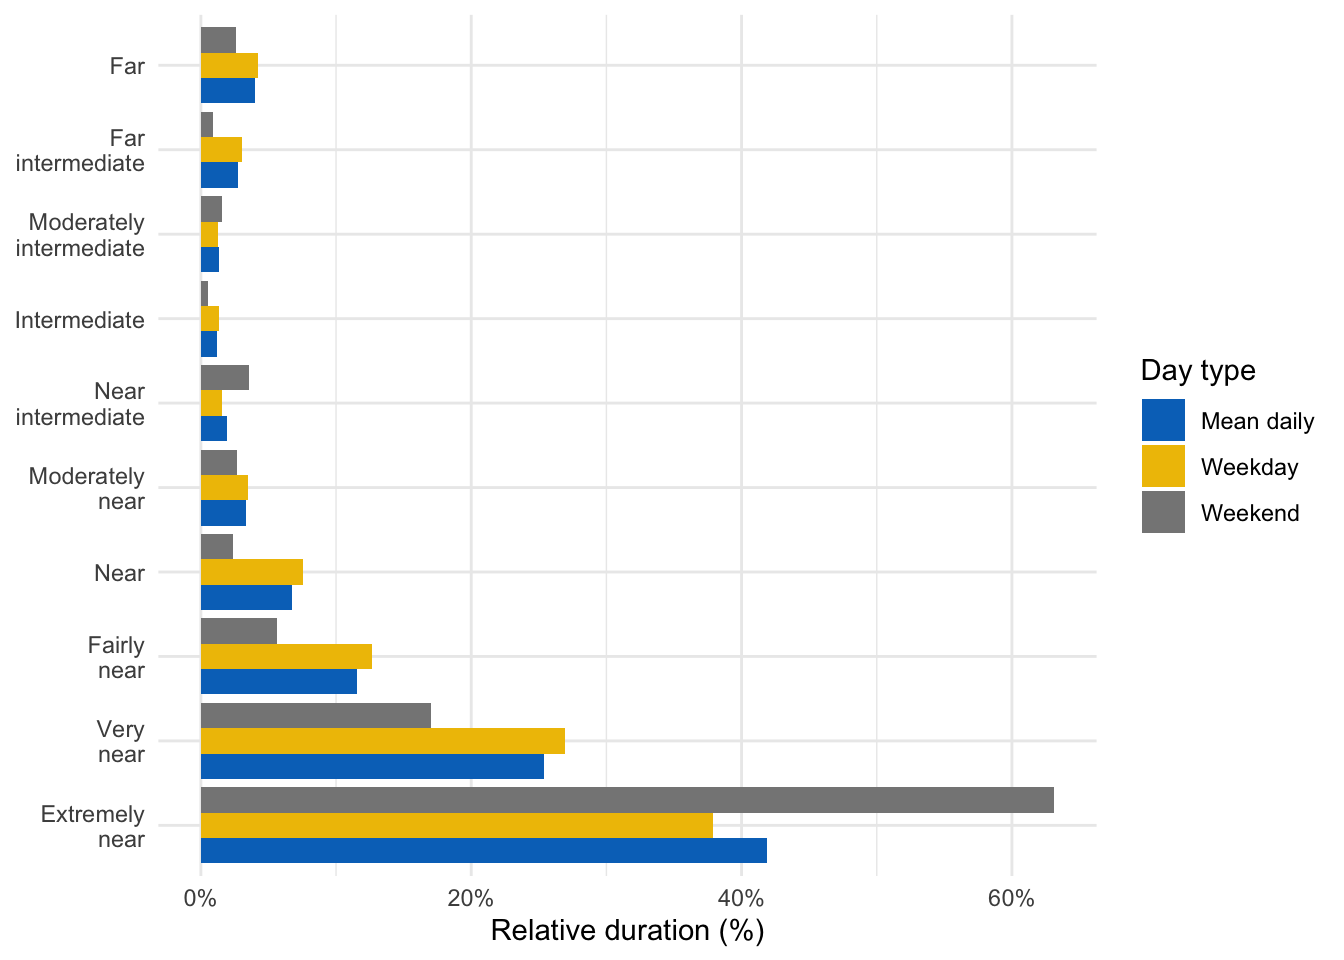

#### Frequency of continuous near work

Continuous near-work is typically defined as sustained viewing within a near distance for some minimum duration, allowing only brief interruptions. We use LightLogR’s `cluster` function to identify episodes of continuous near work. Here we define a near-work episode as viewing distance between 20 cm and 60 cm that lasts at least 30 minutes, with interruptions of up to 1 minute allowed (meaning short breaks ≤1 min do not end the episode). Using [extract_clusters()](https://tscnlab.github.io/LightLogR/reference/extract_clusters.html) with those parameters, we count how many such episodes occur per day.

@tbl-continuousnear summarizes the average frequency of continuous near-work episodes per day, and @fig-visbreak provides an example visualization of these episodes on the distance time series.

In [ ]:
dataCC |> 
  extract_clusters(
    Dis >= 20 & Dis < 60,            # condition: near-work distance
    cluster.duration = "30 mins",    # minimum duration of a continuous episode
    interruption.duration = "1 min", # maximum gap allowed within an episode
    drop.empty.groups = FALSE        # keep days with zero episodes in output
  ) |> 
  summarize_numeric(remove = c("start", "end", "epoch", "duration"),
                    add.total.duration = FALSE) |>    # count number of episodes per day
  mean_daily(prefix = "Frequency of ") |>             # compute daily mean frequency
  gt() |> fmt_number() 

(`geom_line()`).

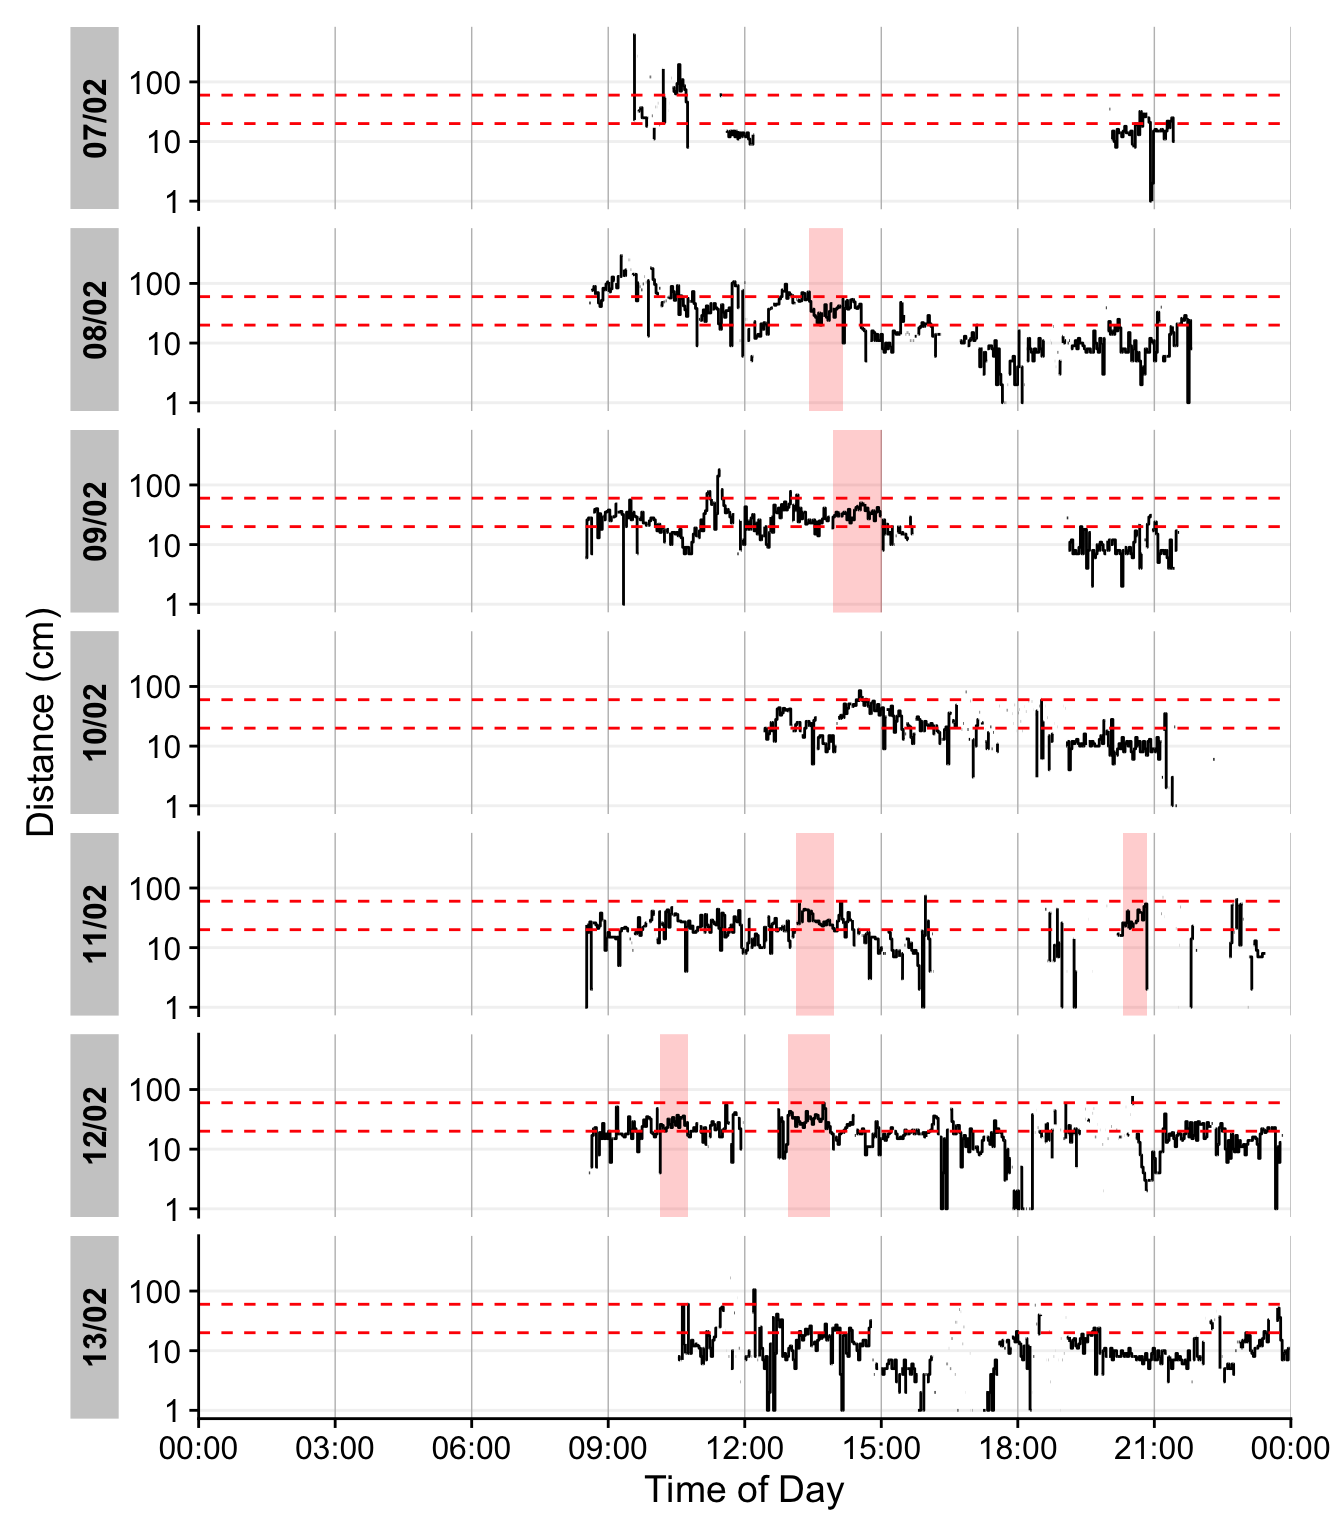

In [ ]:
dataCC |> 
  add_clusters(
    Dis >= 20 & Dis < 60,
    cluster.duration = "30 mins",
    interruption.duration = "1 min"
  ) |> 
  gg_day(y.axis = Dis, y.axis.label = "Distance (cm)", geom = "line") |> 
  gg_state(state, fill = "red") +
  geom_hline(yintercept = c(20, 60), col = "red", linetype = "dashed")

#### Near-work episodes

Beyond frequency, we can characterize near-work episodes by their duration and typical viewing distance. This section extracts all near-work episodes (using a shorter minimum duration to capture more routine near-work bouts) and summarizes three aspects: (1) frequency (count of episodes per day), (2) average duration of episodes, and (3) average distance during those episodes. These results are combined in @tbl-nearworkepisodes.

In [ ]:
dataCC |> 
  extract_clusters(
    Dis >= 20 & Dis < 60,
    cluster.duration = "5 secs",    # minimal duration to count as an episode (very short to capture all)
    interruption.duration = "20 secs",
    drop.empty.groups = FALSE
  ) |> 
  extract_metric(dataCC, distance = mean(Dis, na.rm = TRUE)) |>  # calculate mean distance during each episode
  summarize_numeric(remove = c("start", "end", "epoch"), prefix = "",
                    add.total.duration = FALSE) |>  
  mean_daily(prefix = "") |>    # daily averages for each metric
  gt() |> fmt_number(c(distance, episodes), decimals = 0) |> #table
  cols_units(distance = "cm")

> In the above, `extract_metric(..., distance = mean(Dis, ...))` computes the mean viewing distance during each episode, and the subsequent `summarize_numeric` and `mean_daily` steps derive daily averages of episode count, duration, and distance.

#### Visual breaks

`Visual breaks` are a little different, compared to the previous metrics. The difference is that, in this case, the minimum break and the previous episode is important. This leads to a two step process, where we first extract instances of `Distance` above 100 cm for at least 20 seconds, before we filter for a previous duration of at maximum 20 minutes. @tbl-visualbreaks provides the daily frequency of visual breaks.

In [ ]:
dataCC |> 
  extract_clusters(Dis >= 100, #define the condition, greater 100 cm away
                   cluster.duration = "20 secs", #define the minimum duration
                   return.only.clusters = FALSE, #return non-clusters as well
                   drop.empty.groups = FALSE #keep all days, even without clusters
                   ) |> 
  # return only clusters with previous episode lengths of maximum 20 minutes:
  filter((start - lag(end) <= duration("20 mins")), is.cluster) |> 
  summarize_numeric(remove = c("start", "end", "epoch", "is.cluster", "duration"), 
                    prefix = "",
                    add.total.duration = FALSE) |>  #count the number of episodes
  mean_daily(prefix = "Daily ") |> #daily means
  gt() |> fmt_number(decimals = 1) #table

(`geom_line()`).

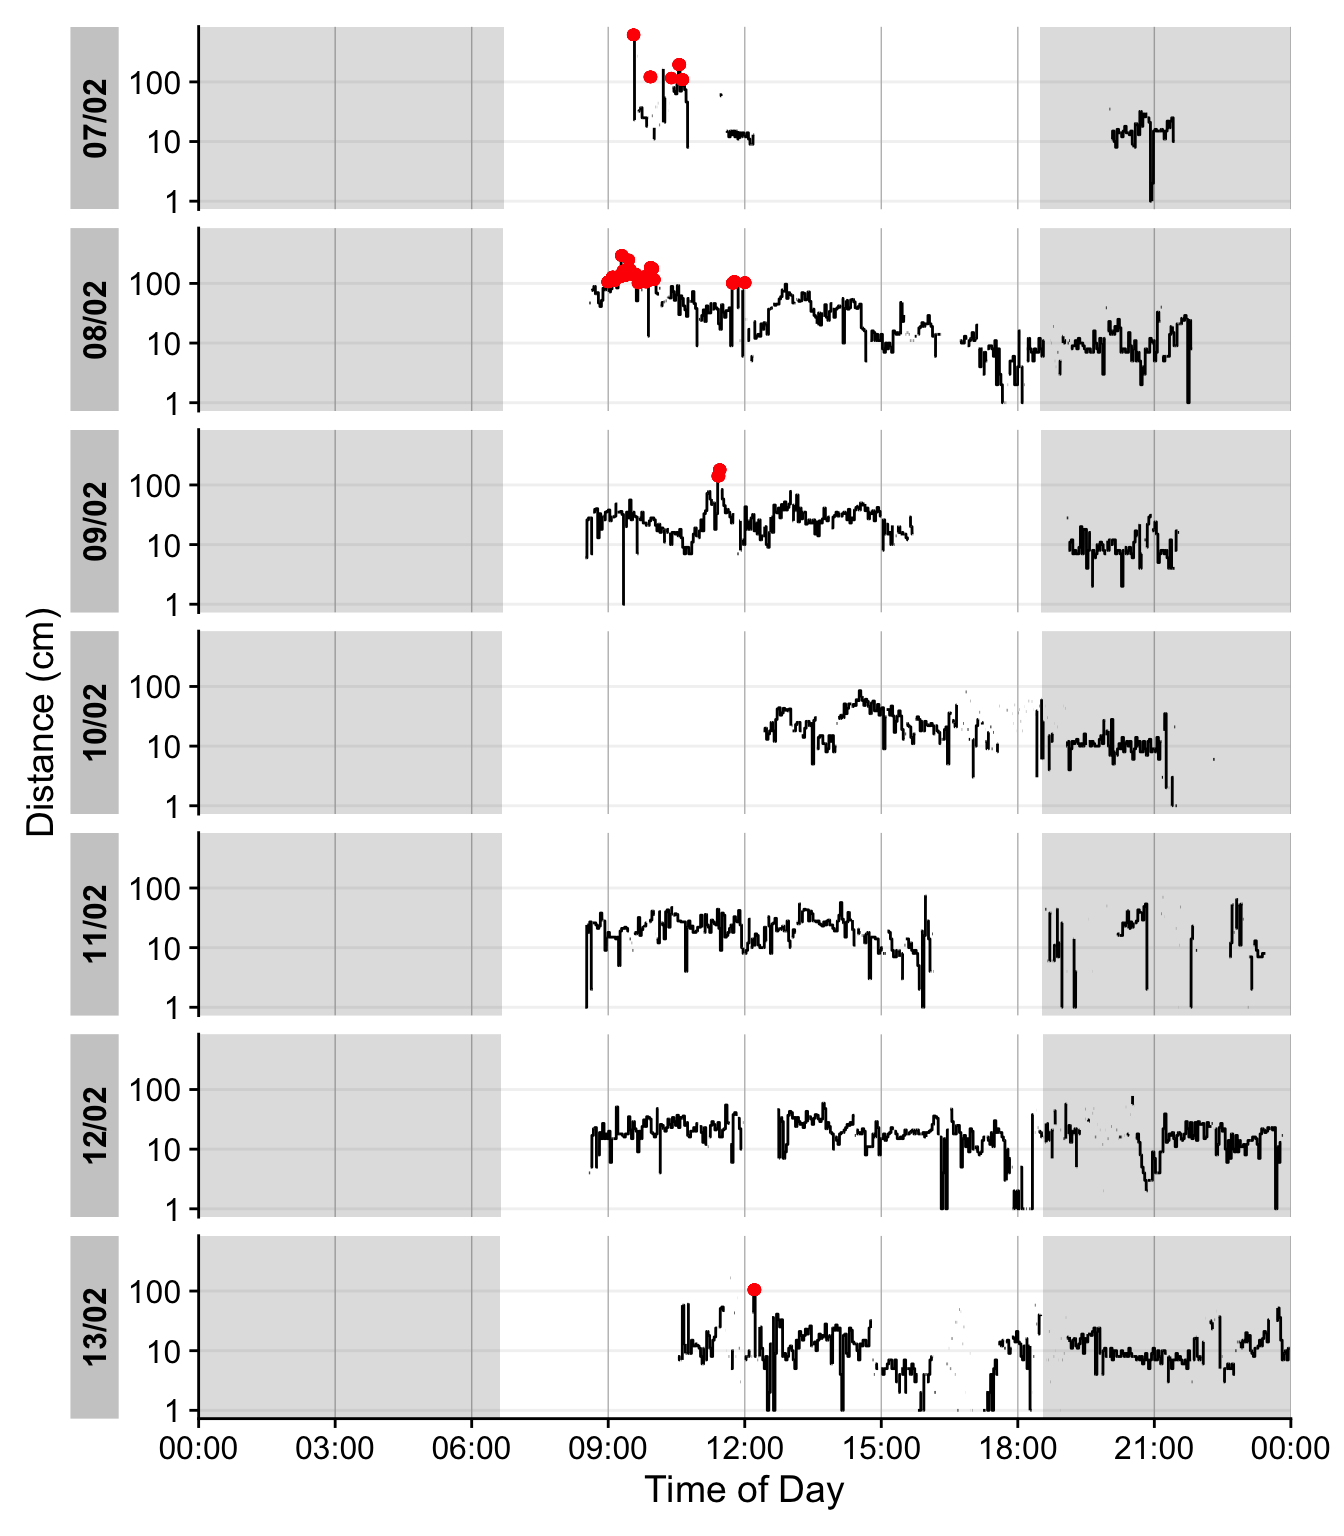

In [ ]:
dataCC |> 
    extract_clusters(Dis >= 100, #define the condition, greater 100 cm away
                   cluster.duration = "20 secs", #define the minimum duration
                   return.only.clusters = FALSE, #return non-clusters as well
                   drop.empty.groups = FALSE #keep all days, even without clusters
                   ) |> 
  # return only clusters with previous episode lengths of maximum 20 minutes:
  filter((start - lag(end) <= duration("20 mins")), is.cluster) %>%
  add_states(dataCC, ., ) |> 
  gg_day(y.axis = Dis, y.axis.label = "Distance (cm)", geom = "line") |> 
  gg_photoperiod(coordinates) +
  geom_point(data = \(x) filter(x, is.cluster), col = "red")

#### Distance with spatial distribution

The `Clouclip` device outputs a singular measure for distance, while the visual environment in natural contiditions contains many distances, depending on the solid angle and direction of the measurement. A device like the `VEET` increases the spatial resolution of these measurements, allowing for more in-depth analyses of the size and position of an object within the field of view. In the case of the `VEET`, data are collected from an 8x8 measurement grid, spanning 52° vertically and 41° horizontally. Here are exemplary observations from six different days at the same time.

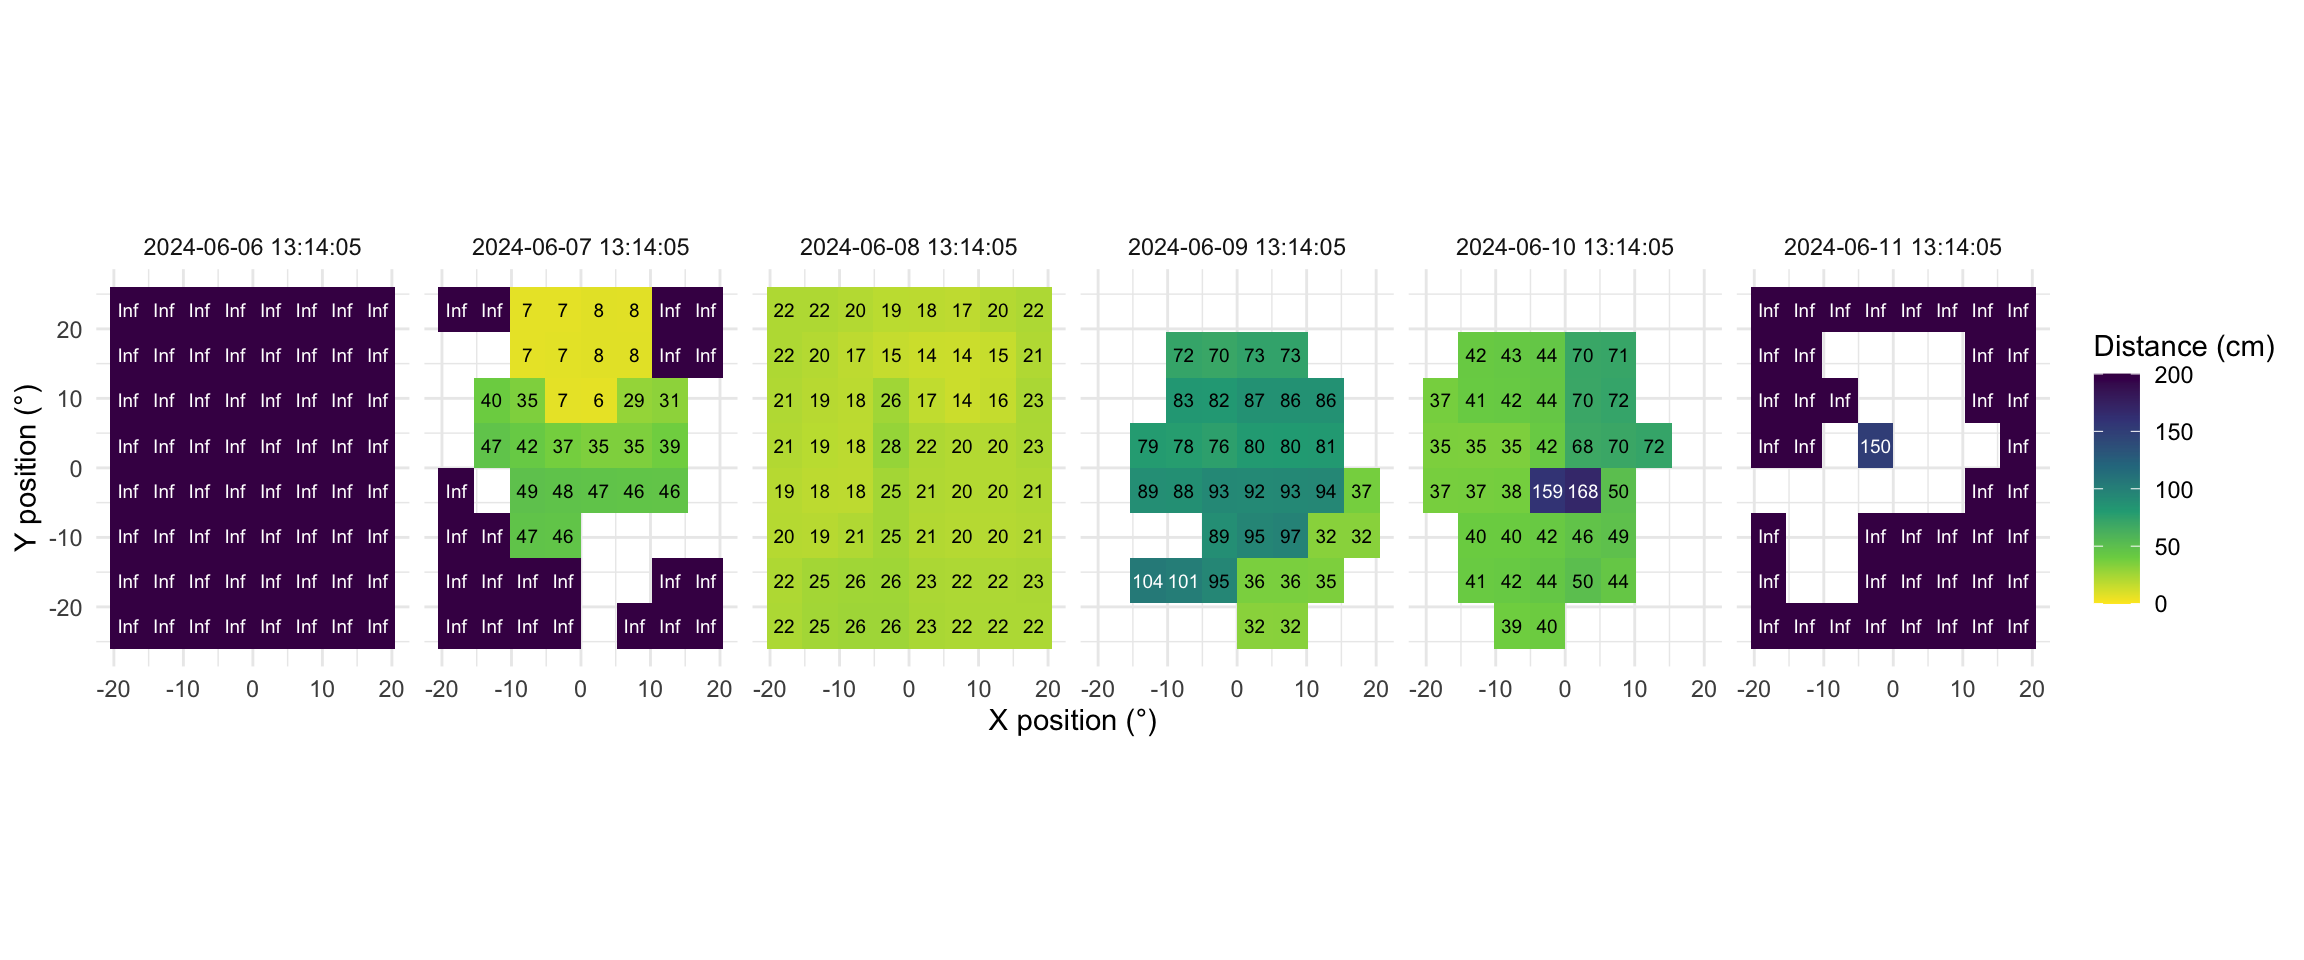

In [ ]:
slicer <- function(x){seq(min((x-1)*64+1), max(x*64, by = 1))} #allows to choose an observation

#set visualization parameters
extras <- list(
  geom_tile(),
  scale_fill_viridis_c(direction = -1, limits = c(0, 200),
                       oob = scales::oob_squish_any),
  scale_color_manual(values = c("black", "white")),
  theme_minimal(),
  guides(colour = "none"),
  geom_text(aes(label = (dist1/10) |> round(0), colour = dist1>1000), size = 2.5),
  coord_fixed(),
  labs(x = "X position (°)", y = "Y position (°)", 
       fill = "Distance (cm)", alpha = "Confidence (0-255)"))

dataVEET3 |> 
  slice(slicer(9530)) |>  #choose a particular observation
  mutate(dist1 = ifelse(dist1 == 0, Inf, dist1)) |> #replace 0 distances with 5m
  filter(conf1 >= 0.1 | dist1 == Inf) |> #remove data that has less than 10% confidence
  ggplot(aes(x=x.pos, y=y.pos, fill = dist1/10))+ extras + #plot the data
  facet_grid(~Datetime) #show one plot per day

To use these distance data in the framework shown above for the `Clouclip` device, a sensible method to condense the data has to be applied. This method has to be chosen based on theoretical assumptions what a relevant distance within the field of view is. Possible methods include:

-   average across all (high confidence) distance values within the grid
-   closest (high confidence) distance within the grid
-   (high confidence) values at or around a given grid position, e.g., ±10 degrees around the central view (0°)

We will demonstrate these three exemplary methods for a single day (`2024-06-10`), all leading to a data structure akin to the `Clouclip`, i.e., to be used for further calculation of visual experience metrics.

This dataset has irregular or singular data. Singular data will automatically be removed. If you are uncertain about irregular data, you can check them with `gap_finder`, `gap_table`, and `gg_gaps`.

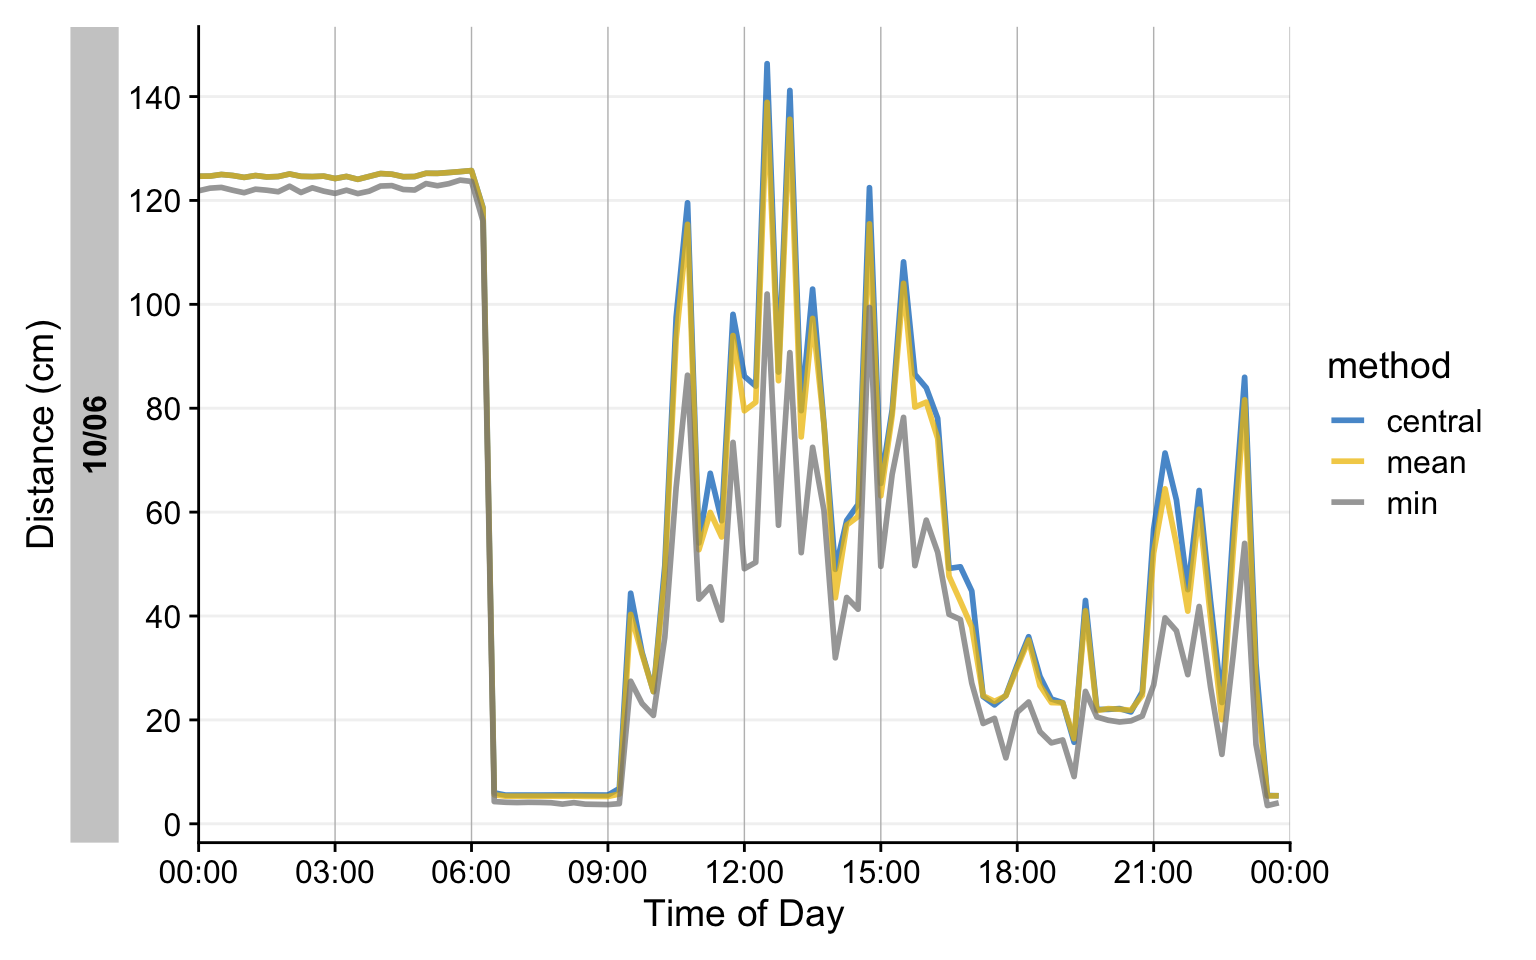

In [ ]:
dataVEET3_part <- #filter one day
dataVEET3 |>
  filter_Date(start = "2024-06-10", length = "1 day")

dataVEET3_condensed <- 
dataVEET3_part |> 
  group_by(Datetime, .add = TRUE) |> #group additionally by every observation
  filter(conf1 >= 0.1) |> #remove data with low confidence
  summarize(
    distance_mean = mean(dist1), #average across all distance values,
    distance_min = min(dist1), #closest across all distance values,
    distance_central = mean(dist1[between(x.pos, -10,10) & between(y.pos, -10,10)]), #central distance
    n = n(), #number of (valid) grid points
    .groups = "drop_last"
  )

dataVEET3_condensed |> 
  aggregate_Datetime("15 mins", numeric.handler = \(x) mean(x, na.rm = TRUE)) |> #create 15 minute data
  remove_partial_data(by.date = TRUE) |> #remove midnight data points
  pivot_longer(contains("distance"), #put all methods into a long file for plotting
               names_to = c(".value", "method"),
    names_pattern = "(distance)_(mean|min|max|central)"
    ) |>
  gg_day(y.axis = distance/10, 
         geom = "line", 
         aes_col = method,
         group = method,
         linewidth = 1, 
         alpha = 0.75, 
         y.scale = "identity",
         y.axis.breaks = seq(0,150, by = 20), 
         y.axis.label = "Distance (cm)"
         )

Many more options are available based on the richer dataset, e.g., condensation rules based on the number of points in the grid with a given condition, or the variation within the grid.

### Light

The `Clouclip` illuminance data in our example are extremely low (the device was mostly used in dim conditions), which would make certain light exposure summaries trivial or not meaningful. To better illustrate light exposure metrics, we turn to the exemplary `VEET` device’s illuminance data, which capture a broader range of lighting conditions. We import the `VEET` ambient light data (already preprocessed to have regular 5-second intervals as described above) and briefly examine its distribution.

**Illuminance distribution**: The illuminance values from the Clouclip were almost always near zero, while the VEET data include outdoor exposures up to several thousand lux. The contrast is evident from comparing histograms of the two datasets’ lux values (Clouclip vs. VEET). The VEET illuminance histogram (see @fig-hist-VEETlight) shows a heavily skewed distribution with a spike at zero (indicating many intervals of complete darkness or the sensor covered) and a long tail extending to very high lux values. Such zero-inflated and skewed data are common in wearable light measurements \[@ZaunerEtAl2025JBR\].

In [ ]:
dataCC |> 
  ggplot(aes(x = Lux)) + 
  labs(x = "Photopic illuminance (lx)") +
  geom_histogram(bins = 100) + 
  theme_minimal() +
  scale_x_continuous(trans = "symlog", breaks = c(0, 1, 10, 100, 1000))

(`stat_bin()`).

In [ ]:
dataVEET |> 
  ggplot(aes(x = Lux)) + 
  labs(x = "Photopic illuminance (lx)") +
  geom_histogram(bins = 100) + 
  theme_minimal() +
  scale_x_continuous(trans = "symlog", breaks = c(0, 1, 10, 100, 1000, 10000))

(`stat_bin()`).

After confirming that the VEET data cover a broad dynamic range of lighting, we proceed with calculating light exposure metrics. (The VEET data had been cleaned for gaps and irregularities as described earlier; see [Supplement 1](https://tscnlab.github.io/ZaunerEtAl_JVis_2025/supplement-preview.html) for the gap summary table.)

#### Average light exposure

A basic metric is the average illuminance over the day. @tbl-lightexposure shows the mean illuminance (in lux) for weekdays, weekends, and overall daily mean, calculated directly from the raw lux values.

In [ ]:
dataVEET |> 
  select(Id, Date, Datetime, Lux) |> 
  summarize_numeric(prefix = "mean ", remove = c("Datetime")) |> 
  to_mean_daily() |>             # compute mean for weekday, weekend, all days
  fmt_number(decimals = 1) |> 
  cols_hide(`average episodes`) |>  # hide an irrelevant column (episodes count)
  cols_label(`average mean Lux` = "Mean photopic illuminance (lx)")

However, because illuminance data tend to be extremely skewed and contain many zero values (periods of darkness), the arithmetic mean can be [misleading](https://tscnlab.github.io/LightLogR/articles/log.html). A common approach is to apply a logarithmic transform to illuminance before averaging, which down-weights extreme values and accounts for the multiplicative nature of light intensity effects. LightLogR provides helper functions [`log_zero_inflated()`]((https://tscnlab.github.io/LightLogR/reference/log_zero_inflated.html)) and its inverse [`exp_zero_inflated()`](https://tscnlab.github.io/LightLogR/reference/log_zero_inflated.html) to handle log-transformation when zeros are present (by adding a small offset before log, and back-transforming after averaging). Using this approach, we recompute the daily mean illuminance. The results in @tbl-lightexposure2 show that the log-transformed mean (back-transformed to lux) is much lower, reflecting the fact that for much of the time illuminance was near zero. This transformed mean is often more representative of typical exposure for skewed data.

In [ ]:
dataVEET |> 
  select(Id, Date, Datetime, Lux) |> 
  mutate(Lux = Lux |> log_zero_inflated()) |>        # log-transform with zero handling
  summarize_numeric(prefix = "mean ", remove = c("Datetime")) |> 
  mean_daily(prefix = "") |>                         # get daily mean of log-lux
  mutate(`mean Lux` = `mean Lux` |> exp_zero_inflated()) |>  # back-transform to lux
  gt() |> fmt_number(decimals = 1) |> cols_hide(episodes) |> 
  cols_label(`mean Lux` = "Mean photopic illuminance (lx)")

#### Duration in high-light (outdoor) conditions

Another important metric is the amount of time spent under bright light, often used as a proxy for outdoor exposure. We define thresholds corresponding to outdoor light levels (e.g. 1000 lx and above). Here, we categorize each 5-second interval of illuminance into bands: Outdoor bright (≥1000 lx), Outdoor very bright (≥2000 lx), and Outdoor extremely bright (≥3000 lx). We then sum the duration in each category per day. We first create a categorical variable for illuminance range:

In [ ]:
# Define outdoor illuminance thresholds (in lux)
out_breaks <- c(1e3, 2e3, 3e3, Inf)
out_labels <- c(
    "Outdoor bright",          # [1000, 2000) lx
    "Outdoor very bright",     # [2000, 3000) lx
    "Outdoor extremely bright" # [3000, ∞) lx
  )

dataVEET <- dataVEET |> 
  mutate(Lux_range = cut(Lux, breaks = out_breaks, labels = out_labels))

Now we compute the mean daily duration spent in each of these outdoor light ranges (@tbl-outdoor):

In [ ]:
dataVEET |> 
  drop_na(Lux_range) |> 
  group_by(Lux_range, .add = TRUE) |> 
  durations(Lux) |>                            # total duration per range per day
  pivot_wider(names_from = Lux_range, values_from = duration) |> 
  to_mean_daily("") |> 
  fmt_duration(input_units = "seconds", output_units = "minutes")

It is also informative to visualize when these high-light conditions occurred. @fig-outdoor shows a timeline plot with periods of outdoor-level illuminance highlighted in color. In this example, violet denotes ≥1000 lx, green ≥2000 lx, and yellow ≥3000 lx. Grey shading indicates nighttime (from civil dusk to dawn) for context.

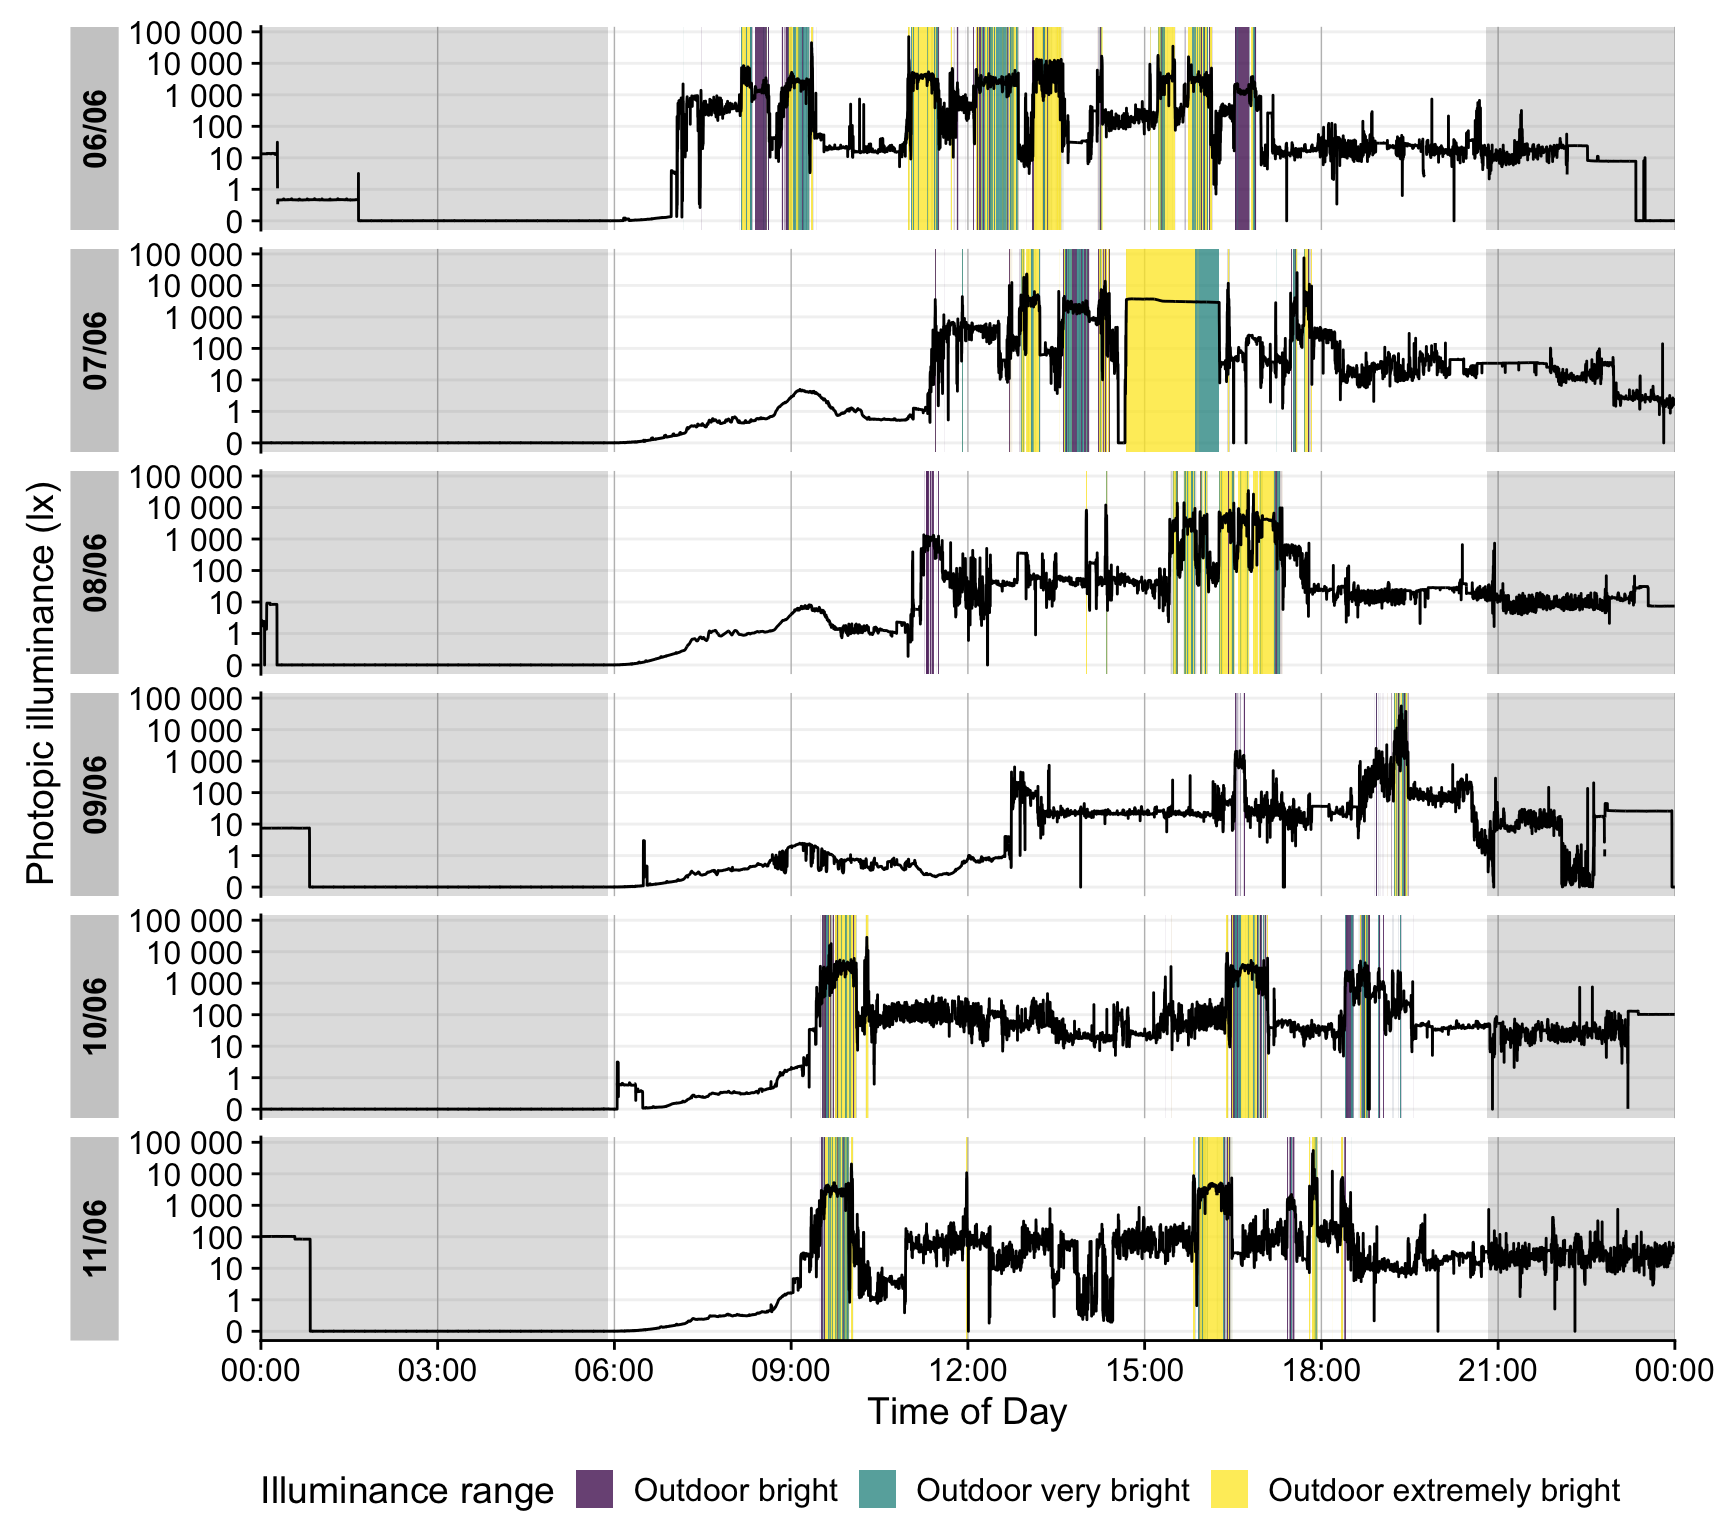

In [ ]:
dataVEET |> 
  gg_day(y.axis = Lux, y.axis.label = "Photopic illuminance (lx)", geom = "line", jco_color = FALSE) |> 
  gg_state(Lux_range, aes_fill = Lux_range, alpha = 0.75) |> 
  gg_photoperiod(coordinates) +
  scale_fill_viridis_d() +
  labs(fill = "Illuminance range") +
  theme(legend.position = "bottom")

#### Frequency of transitions from indoor to outdoor light

We next consider how often the subject moved from an indoor light environment to an outdoor-equivalent environment. We operationally define an “outdoor transition” as a change from \<1000 lx to ≥1000 lx. Using the cleaned VEET data, we extract all instances where illuminance crosses that threshold from below to above.

@tbl-changesoutdoor shows the average number of such transitions per day. Note that if data are recorded at a fine temporal resolution (5 s here), very brief excursions above 1000 lx could count as transitions and inflate this number. Indeed, the initial count is fairly high, reflecting fleeting spikes above 1000 lx that might not represent meaningful outdoor exposures.

In [ ]:
dataVEET |> 
  extract_states(Outdoor, Lux >= 1000, group.by.state = FALSE) |>  # label each interval as Outdoor (Lux≥1000) or not
  filter(!lead(Outdoor) & Outdoor) |>   # find instances where the previous interval was "indoor" and current is "outdoor"
  summarize_numeric(prefix = "mean ",
    remove = c("Datetime", "Outdoor", "start", "end", "duration"),
    add.total.duration = FALSE) |> 
  mean_daily(prefix = "") |> 
  gt() |> fmt_number(episodes, decimals = 0) |> 
  fmt_duration(`mean epoch`, input_units = "seconds", output_units = "seconds")

To obtain a more meaningful measure, we can require that the outdoor state persists for some minimum duration to count as a true transition (filtering out momentary fluctuations around the 1000 lx mark). For example, we can require that once ≥1000 lx is reached, it continues for at least 5 minutes (allowing short interruptions up to 20 s). @tbl-changesoutdoor2 applies this criterion, resulting in a lower, more plausible transition count.

In [ ]:
dataVEET |> 
  extract_clusters(Lux >= 1000,
                   cluster.duration = "5 min", 
                   interruption.duration = "20 secs",
                   return.only.clusters = FALSE,
                   drop.empty.groups = FALSE) |> 
  filter(!lead(is.cluster) & is.cluster) |> 
  summarize_numeric(prefix = "mean ",
    remove = c("Datetime", "start", "end", "duration"),
    add.total.duration = FALSE) |> 
  mean_daily(prefix = "") |> 
  gt() |> fmt_number(episodes, decimals = 0)

#### Longest sustained bright-light period

The final light exposure metric we illustrate is the longest continuous period above a certain illuminance threshold (often termed Longest Period Above Threshold, e.g. PAT<sub>1000</sub> for 1000 lx). This gives a sense of the longest outdoor exposure in a day. Along with it, one might report the total duration above that threshold in the day (TAT<sub>1000</sub>). While we could derive these from the earlier analyses, LightLogR provides dedicated [metric](https://tscnlab.github.io/LightLogR/articles/Metrics.html) functions for such calculations, which can compute multiple related metrics at once.

Using the function [period_above_threshold()](https://tscnlab.github.io/LightLogR/reference/period_above_threshold.html) for PAT and [duration_above_threshold()](https://tscnlab.github.io/LightLogR/reference/duration_above_threshold.html) for TAT, we calculate both metrics for the 1000 lx threshold. @tbl-periodoutdoor shows the mean of these metrics across days (i.e., average longest bright period and average total bright time per day).

In [ ]:
dataVEET |> 
  summarize(
    period_above_threshold(Lux, Datetime, threshold = 1000, na.rm = TRUE, as.df = TRUE),
    duration_above_threshold(Lux, Datetime, threshold = 1000, na.rm = TRUE, as.df = TRUE),
    .groups = "keep"
  ) |> 
  to_mean_daily("")

### Spectrum

The `VEET` device’s spectral sensor provides rich data beyond simple lux values, but it requires reconstruction of the actual light spectrum from raw sensor counts. We processed the spectral sensor data in order to compute two example spectrum-based metrics. Detailed data import, normalization, and spectral reconstruction steps are given in the [Supplement 1](https://tscnlab.github.io/ZaunerEtAl_JVis_2025/supplement-preview.html); here we present the resulting metrics. Briefly, the `VEET`’s spectral sensor recorded counts in ten wavelength bands (roughly 415 nm to 910 nm), plus a `Dark` and a `Clear` channel[1]. After normalizing by sensor gain and applying the calibration matrix, we obtained an estimated spectral irradiance distribution for each 5-minute interval in the recording. With these reconstructed spectra, we can derive novel metrics that consider spectral content of the light.

> **Note**
>
> Spectrum-based metrics in wearable data are relatively new and less established compared to distance or broadband light metrics. The following examples illustrate potential uses of spectral data in a theoretical sense, which can be adapted as needed for specific research questions.

#### Ratio of short- vs. long-wavelength light

Our first spectral metric is the ratio of short-wavelength light to long-wavelength light, which is relevant, for example, in assessing the blue-light content of exposure. We define “short” wavelengths as 400–500 nm and “long” as 600–700 nm. Using the list-column of spectra in our dataset, we integrate each spectrum over these ranges (using [`spectral_integration()`](https://tscnlab.github.io/LightLogR/reference/spectral_integration.html)), and then compute the ratio short/long for each time interval. We then summarize these ratios per day.

[1] Note that older firmware versions contained two `Clear` channels and the highest spectral channel was indicated as 940 nm. Data collected with this early firmware version are not suitable for spectral reconstruction in the context of research projects.

In [ ]:
dataVEET <- dataVEET2 |> 
  select(Id, Date, Datetime, Spectrum) |>    # focus on ID, date, time, and spectrum
  mutate(
    short = Spectrum |> map_dbl(spectral_integration, wavelength.range = c(400, 500)),
    long  = Spectrum |> map_dbl(spectral_integration, wavelength.range = c(600, 700)),
    `sl ratio` = ifelse(is.nan(short / long), NA, short / long)   # compute short-to-long ratio
  )

@tbl-ratio shows the average short/long wavelength ratio, averaged over each day (and then as weekday/weekend means if applicable). In this dataset, the values give an indication of the spectral balance of the light the individual was exposed to (higher values mean relatively more short-wavelength content).

In [ ]:
dataVEET |> 
  summarize_numeric(prefix = "", remove = c("Datetime", "Spectrum")) |> 
  # mean_daily(prefix = "") |>
  gt() |> 
  fmt_number(decimals = 1, scale_by = 1000) |>
  fmt_number(`sl ratio`, decimals = 3) |>
  cols_hide(episodes)

#### Short-wavelength light at specific times of day

The second spectral example examines short-wavelength light exposure as a function of time of day. Certain studies might be interested in, for instance, blue-light exposure during midday versus morning or night. We demonstrate three approaches: (a) filtering the data to a specific local time window, and (b) aggregating by hour of day to see a daily profile of short-wavelength exposure. Additionally, we (c) look at differences between day and night periods.

#### Local morning exposure

@tbl-shortfilter isolates the time window between 7:00 and 11:00 each day and computes the average short-wavelength irradiance in that interval. This represents a straightforward query: “How much blue light does the subject get in the morning on average?”

``` r
dataVEET |> 
  filter_Time(start = "7:00:00", end = "11:00:00") |>    # filter data to local 7am–11am
  select(-c(Spectrum, long, `sl ratio`, Time, Datetime)) |>
  summarize_numeric(prefix = "") |> 
  # mean_daily(prefix = "") |> 
  gt() |> fmt_number(short, scale_by = 1000) |> 
  cols_label(short = "Short-wavelength irradiance (mW/m²)") |> 
  cols_hide(episodes)
```

<div id="snkzgbeeog" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
<style>#snkzgbeeog table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#snkzgbeeog thead, #snkzgbeeog tbody, #snkzgbeeog tfoot, #snkzgbeeog tr, #snkzgbeeog td, #snkzgbeeog th {
  border-style: none;
}

#snkzgbeeog p {
  margin: 0;
  padding: 0;
}

#snkzgbeeog .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #A8A8A8;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
}

#snkzgbeeog .gt_caption {
  padding-top: 4px;
  padding-bottom: 4px;
}

#snkzgbeeog .gt_title {
  color: #333333;
  font-size: 125%;
  font-weight: initial;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-color: #FFFFFF;
  border-bottom-width: 0;
}

#snkzgbeeog .gt_subtitle {
  color: #333333;
  font-size: 85%;
  font-weight: initial;
  padding-top: 3px;
  padding-bottom: 5px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-color: #FFFFFF;
  border-top-width: 0;
}

#snkzgbeeog .gt_heading {
  background-color: #FFFFFF;
  text-align: center;
  border-bottom-color: #FFFFFF;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#snkzgbeeog .gt_bottom_border {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#snkzgbeeog .gt_col_headings {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#snkzgbeeog .gt_col_heading {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 6px;
  padding-left: 5px;
  padding-right: 5px;
  overflow-x: hidden;
}

#snkzgbeeog .gt_column_spanner_outer {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  padding-top: 0;
  padding-bottom: 0;
  padding-left: 4px;
  padding-right: 4px;
}

#snkzgbeeog .gt_column_spanner_outer:first-child {
  padding-left: 0;
}

#snkzgbeeog .gt_column_spanner_outer:last-child {
  padding-right: 0;
}

#snkzgbeeog .gt_column_spanner {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 5px;
  overflow-x: hidden;
  display: inline-block;
  width: 100%;
}

#snkzgbeeog .gt_spanner_row {
  border-bottom-style: hidden;
}

#snkzgbeeog .gt_group_heading {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  text-align: left;
}

#snkzgbeeog .gt_empty_group_heading {
  padding: 0.5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: middle;
}

#snkzgbeeog .gt_from_md > :first-child {
  margin-top: 0;
}

#snkzgbeeog .gt_from_md > :last-child {
  margin-bottom: 0;
}

#snkzgbeeog .gt_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  margin: 10px;
  border-top-style: solid;
  border-top-width: 1px;
  border-top-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  overflow-x: hidden;
}

#snkzgbeeog .gt_stub {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
}

#snkzgbeeog .gt_stub_row_group {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
  vertical-align: top;
}

#snkzgbeeog .gt_row_group_first td {
  border-top-width: 2px;
}

#snkzgbeeog .gt_row_group_first th {
  border-top-width: 2px;
}

#snkzgbeeog .gt_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#snkzgbeeog .gt_first_summary_row {
  border-top-style: solid;
  border-top-color: #D3D3D3;
}

#snkzgbeeog .gt_first_summary_row.thick {
  border-top-width: 2px;
}

#snkzgbeeog .gt_last_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#snkzgbeeog .gt_grand_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#snkzgbeeog .gt_first_grand_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-style: double;
  border-top-width: 6px;
  border-top-color: #D3D3D3;
}

#snkzgbeeog .gt_last_grand_summary_row_top {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: double;
  border-bottom-width: 6px;
  border-bottom-color: #D3D3D3;
}

#snkzgbeeog .gt_striped {
  background-color: rgba(128, 128, 128, 0.05);
}

#snkzgbeeog .gt_table_body {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#snkzgbeeog .gt_footnotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#snkzgbeeog .gt_footnote {
  margin: 0px;
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#snkzgbeeog .gt_sourcenotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#snkzgbeeog .gt_sourcenote {
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#snkzgbeeog .gt_left {
  text-align: left;
}

#snkzgbeeog .gt_center {
  text-align: center;
}

#snkzgbeeog .gt_right {
  text-align: right;
  font-variant-numeric: tabular-nums;
}

#snkzgbeeog .gt_font_normal {
  font-weight: normal;
}

#snkzgbeeog .gt_font_bold {
  font-weight: bold;
}

#snkzgbeeog .gt_font_italic {
  font-style: italic;
}

#snkzgbeeog .gt_super {
  font-size: 65%;
}

#snkzgbeeog .gt_footnote_marks {
  font-size: 75%;
  vertical-align: 0.4em;
  position: initial;
}

#snkzgbeeog .gt_asterisk {
  font-size: 100%;
  vertical-align: 0;
}

#snkzgbeeog .gt_indent_1 {
  text-indent: 5px;
}

#snkzgbeeog .gt_indent_2 {
  text-indent: 10px;
}

#snkzgbeeog .gt_indent_3 {
  text-indent: 15px;
}

#snkzgbeeog .gt_indent_4 {
  text-indent: 20px;
}

#snkzgbeeog .gt_indent_5 {
  text-indent: 25px;
}

#snkzgbeeog .katex-display {
  display: inline-flex !important;
  margin-bottom: 0.75em !important;
}

#snkzgbeeog div.Reactable > div.rt-table > div.rt-thead > div.rt-tr.rt-tr-group-header > div.rt-th-group:after {
  height: 0px !important;
}
</style>

  Date         Short-wavelength irradiance (mW/m²)
  ------------ -------------------------------------
  VEET         
  2025-06-18   5.44
  2025-06-20   0.95

</div>

#### Hourly profile across the day

To visualize short-wavelength exposure over the course of a day, we aggregate the data into hourly bins. We cut the timeline into 1-hour segments (using local time), compute the mean short-wavelength irradiance in each hour for each day. @fig-shorttime shows the resulting diurnal profile, with short-wavelength exposure expressed as a fraction of the daily maximum for easier comparison.

``` r
# Prepare hourly binned data
dataVEETtime <- dataVEET |>
  cut_Datetime(unit = "1 hour", type = "floor", group_by = TRUE) |>  # bin timestamps by hour
  select(-c(Spectrum, long, `sl ratio`, Datetime)) |>
  summarize_numeric(prefix = "") |> 
  add_Time_col(Datetime.rounded)  |>   # add a Time column (hour of day)
  mutate(rel_short = short / max(short))

#creating the plot
dataVEETtime |> 
  ggplot(aes(x=Time, y = rel_short)) +
  geom_col(aes(fill = factor(Date)), position = "dodge") +
  ggsci::scale_fill_jco() +
  theme_minimal() +
  labs(y = "Normalized short-wavelength irradiance", 
       x = "Local time (HH:MM)",
       fill = "Date") + 
  scale_y_continuous(labels = scales::label_percent()) +
  scale_x_time(labels = scales::label_time(format = "%H:%M"))
```

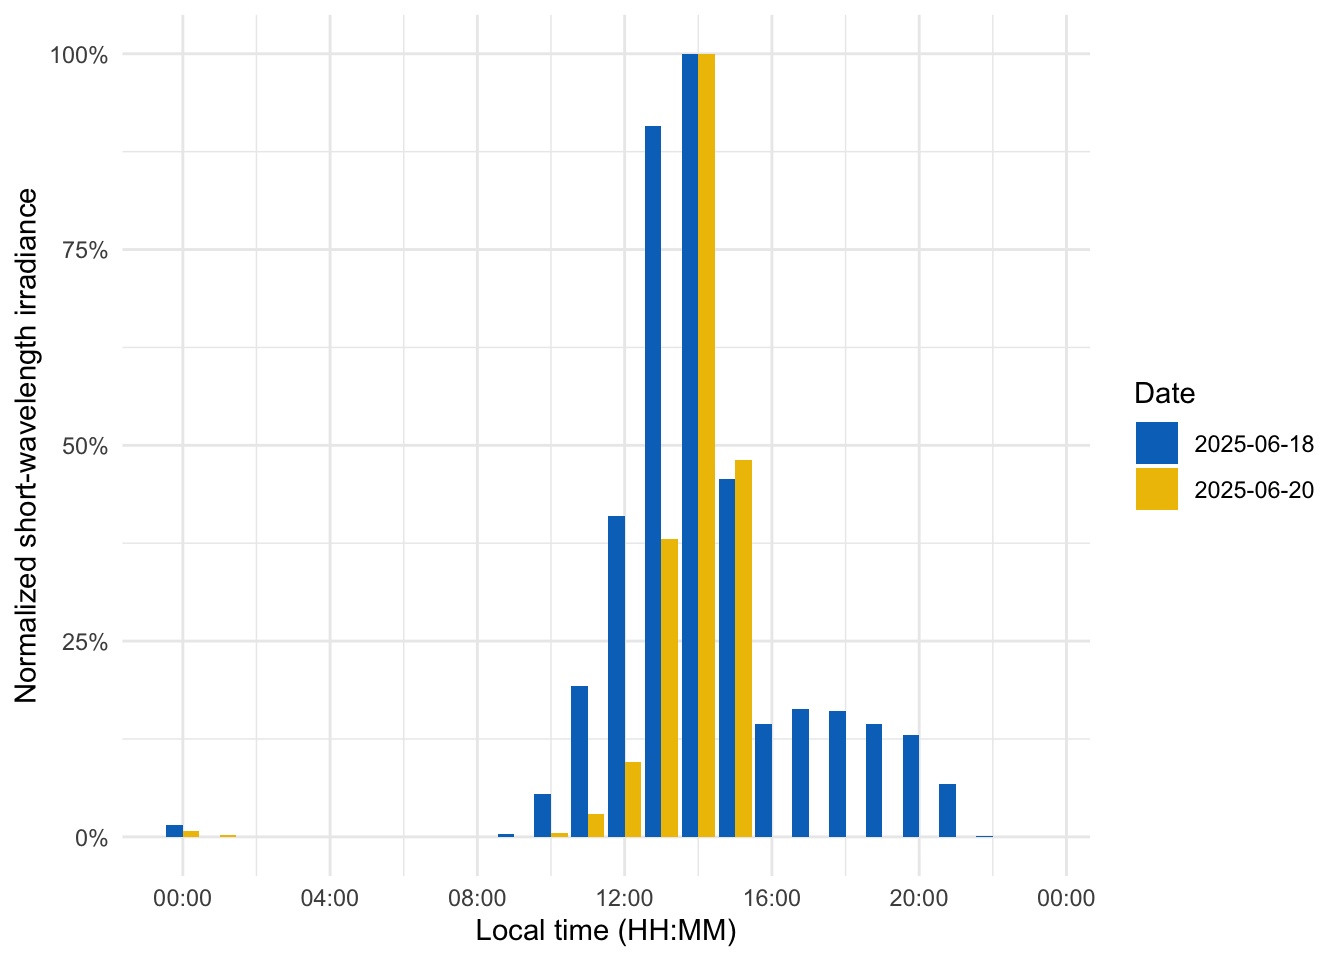

#### Day vs. night (photoperiod)

Finally, we compare short-wavelength exposure during daytime vs. nighttime. Using civil dawn and dusk information (based on geographic coordinates, here set for Houston, TX, USA), we label each measurement as day or night and then compute the total short-wavelength exposure in each period. @tbl-daytime summarizes the daily short-wavelength dose received during the day vs. during the night.

``` r
dataVEET |>
  select(-c(Spectrum, long, `sl ratio`)) |>
  add_photoperiod(coordinates) |> 
  group_by(photoperiod.state, .add = TRUE) |> 
  summarize_numeric(prefix = "", 
                    remove = c("dawn", "dusk", "photoperiod", "Datetime")) |> 
  group_by(photoperiod.state) |> 
  # mean_daily(prefix = "") |> 
  select(-episodes) |> 
  pivot_wider(names_from =photoperiod.state, values_from = short) |> 
  gt() |> fmt_number(scale_by = 1000, decimals = 1)
```

<div id="xcilxwexaz" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
<style>#xcilxwexaz table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#xcilxwexaz thead, #xcilxwexaz tbody, #xcilxwexaz tfoot, #xcilxwexaz tr, #xcilxwexaz td, #xcilxwexaz th {
  border-style: none;
}

#xcilxwexaz p {
  margin: 0;
  padding: 0;
}

#xcilxwexaz .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #A8A8A8;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
}

#xcilxwexaz .gt_caption {
  padding-top: 4px;
  padding-bottom: 4px;
}

#xcilxwexaz .gt_title {
  color: #333333;
  font-size: 125%;
  font-weight: initial;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-color: #FFFFFF;
  border-bottom-width: 0;
}

#xcilxwexaz .gt_subtitle {
  color: #333333;
  font-size: 85%;
  font-weight: initial;
  padding-top: 3px;
  padding-bottom: 5px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-color: #FFFFFF;
  border-top-width: 0;
}

#xcilxwexaz .gt_heading {
  background-color: #FFFFFF;
  text-align: center;
  border-bottom-color: #FFFFFF;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#xcilxwexaz .gt_bottom_border {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#xcilxwexaz .gt_col_headings {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#xcilxwexaz .gt_col_heading {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 6px;
  padding-left: 5px;
  padding-right: 5px;
  overflow-x: hidden;
}

#xcilxwexaz .gt_column_spanner_outer {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  padding-top: 0;
  padding-bottom: 0;
  padding-left: 4px;
  padding-right: 4px;
}

#xcilxwexaz .gt_column_spanner_outer:first-child {
  padding-left: 0;
}

#xcilxwexaz .gt_column_spanner_outer:last-child {
  padding-right: 0;
}

#xcilxwexaz .gt_column_spanner {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 5px;
  overflow-x: hidden;
  display: inline-block;
  width: 100%;
}

#xcilxwexaz .gt_spanner_row {
  border-bottom-style: hidden;
}

#xcilxwexaz .gt_group_heading {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  text-align: left;
}

#xcilxwexaz .gt_empty_group_heading {
  padding: 0.5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: middle;
}

#xcilxwexaz .gt_from_md > :first-child {
  margin-top: 0;
}

#xcilxwexaz .gt_from_md > :last-child {
  margin-bottom: 0;
}

#xcilxwexaz .gt_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  margin: 10px;
  border-top-style: solid;
  border-top-width: 1px;
  border-top-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  overflow-x: hidden;
}

#xcilxwexaz .gt_stub {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
}

#xcilxwexaz .gt_stub_row_group {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
  vertical-align: top;
}

#xcilxwexaz .gt_row_group_first td {
  border-top-width: 2px;
}

#xcilxwexaz .gt_row_group_first th {
  border-top-width: 2px;
}

#xcilxwexaz .gt_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#xcilxwexaz .gt_first_summary_row {
  border-top-style: solid;
  border-top-color: #D3D3D3;
}

#xcilxwexaz .gt_first_summary_row.thick {
  border-top-width: 2px;
}

#xcilxwexaz .gt_last_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#xcilxwexaz .gt_grand_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#xcilxwexaz .gt_first_grand_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-style: double;
  border-top-width: 6px;
  border-top-color: #D3D3D3;
}

#xcilxwexaz .gt_last_grand_summary_row_top {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: double;
  border-bottom-width: 6px;
  border-bottom-color: #D3D3D3;
}

#xcilxwexaz .gt_striped {
  background-color: rgba(128, 128, 128, 0.05);
}

#xcilxwexaz .gt_table_body {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#xcilxwexaz .gt_footnotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#xcilxwexaz .gt_footnote {
  margin: 0px;
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#xcilxwexaz .gt_sourcenotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#xcilxwexaz .gt_sourcenote {
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#xcilxwexaz .gt_left {
  text-align: left;
}

#xcilxwexaz .gt_center {
  text-align: center;
}

#xcilxwexaz .gt_right {
  text-align: right;
  font-variant-numeric: tabular-nums;
}

#xcilxwexaz .gt_font_normal {
  font-weight: normal;
}

#xcilxwexaz .gt_font_bold {
  font-weight: bold;
}

#xcilxwexaz .gt_font_italic {
  font-style: italic;
}

#xcilxwexaz .gt_super {
  font-size: 65%;
}

#xcilxwexaz .gt_footnote_marks {
  font-size: 75%;
  vertical-align: 0.4em;
  position: initial;
}

#xcilxwexaz .gt_asterisk {
  font-size: 100%;
  vertical-align: 0;
}

#xcilxwexaz .gt_indent_1 {
  text-indent: 5px;
}

#xcilxwexaz .gt_indent_2 {
  text-indent: 10px;
}

#xcilxwexaz .gt_indent_3 {
  text-indent: 15px;
}

#xcilxwexaz .gt_indent_4 {
  text-indent: 20px;
}

#xcilxwexaz .gt_indent_5 {
  text-indent: 25px;
}

#xcilxwexaz .katex-display {
  display: inline-flex !important;
  margin-bottom: 0.75em !important;
}

#xcilxwexaz div.Reactable > div.rt-table > div.rt-thead > div.rt-tr.rt-tr-group-header > div.rt-th-group:after {
  height: 0px !important;
}
</style>

  Id     Date         day     night
  ------ ------------ ------- -------
  VEET   2025-06-18   73.9    2.6
  VEET   2025-06-20   112.0   1.0

</div>

> **Note**
>
> In the above, `add_photoperiod(coordinates)` is used as a convenient way to add columns to the data frame, indicating for each timestamp whether it was day or night, given the latitude/longitude.

## Discussion and conclusion

This tutorial demonstrates a standardized, step-by-step pipeline to calculate a variety of visual experience metrics. We illustrated how a combination of LightLogR functions and tidyverse workflows can yield clear and reproducible analyses for wearable device data. While the full pipeline is detailed, each metric is computed through a dedicated sequence of well-documented steps. By leveraging LightLogR’s framework alongside common data analysis approaches, the process remains transparent and relatively easy to follow. The overall goal is to make analysis transparent (with open-source functions), accessible (through thorough documentation, tutorials, and human-readable function naming, all under an MIT license), robust (the package includes ~900 unit tests and continuous integration with bug tracking on GitHub), and community-driven (open feature requests and contributions via GitHub).

Even with standardized pipelines, researchers must still make and document many decisions during data cleaning, time-series handling, and metric calculations — especially for complex metrics that involve grouping data in multiple ways (for example, grouping by distance range as well as by duration for cluster metrics). We have highlighted these decision points in the tutorial (such as how to handle irregular intervals, choosing thresholds for “near” distances or “outdoor” light, and deciding on minimum durations for sustained events). Explicitly considering and reporting these choices is important for reproducibility and for comparing results across studies.

The broad set of features in LightLogR — ranging from data import and cleaning tools (for handling time gaps and irregularities) to visualization functions and metric calculators — make it a powerful toolkit for visual experience research. Our examples spanned circadian-light metrics and myopia-related metrics, demonstrating the versatility of a unified analysis approach. By using community-supported tools and workflows, researchers in vision science, chronobiology, myopia, and related fields can reduce time spent on low-level data wrangling and focus more on interpreting results and advancing scientific understanding.

## Session info

In [ ]:
sessionInfo()

R version 4.5.0 (2025-04-11)
Platform: aarch64-apple-darwin20
Running under: macOS Sequoia 15.5

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.1

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: Europe/Berlin
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices datasets  utils     methods   base     

other attached packages:
 [1] gt_1.0.0        lubridate_1.9.4 forcats_1.0.0   stringr_1.5.1  
 [5] dplyr_1.1.4     purrr_1.0.4     readr_2.1.5     tidyr_1.3.1    
 [9] tibble_3.3.0    ggplot2_3.5.2   tidyverse_2.0.0 LightLogR_0.9.2

loaded via a namespace (and not attached):
 [1] sass_0.4.10        generics_0.1.4     renv_1.1.4         class_7.3-23      
 [5] xml2_1.3.8         KernSmooth_2.23-26 stringi_1.8.7      hms_1.1.3         
 [9] diges

## Data availability statement

All data in this tutorial and Supplement 1 are available from the GitHub repository: https://github.com/tscnlab/ZaunerEtAl_JVis_2025/, archived on Zenodo: https://doi.org/10.5281/zenodo.16566014 under a CC0 license.

## Funding statement

JZ’s position is funded by the MeLiDos project. The project has received funding from the European Partnership on Metrology (22NRM05 MeLiDos), co-financed from the European Union’s Horizon Europe Research and Innovation Programme and by the Participating States. Views and opinions expressed are however those of the author(s) only and do not necessarily reflect those of the European Union or EURAMET. Neither the European Union nor the granting authority can be held responsible for them. JZ, LAO, and MS received research funding from Reality Labs Research. The funders had no role in study design, data collection and analysis, decision to publish or preparation of the manuscript.

## Conflict of interest statement

JZ declares the following potential conflict of interest in the past five years (2021-2025). Funding: Received research funding from Reality Labs Research.

AN declares the following potential conflicts of interest in the past five years (2021-2025). none

LAO declares the following potential conflict of interest in the past five years (2021-2025). Consultancy: Zeiss, Alcon. Patents: US 11375890 B2

MS declares the following potential conflicts of interest in the past five years (2021–2025). Academic roles: Member of the Board of Directors, Society of Light, Rhythms, and Circadian Health (SLRCH); Chair of Joint Technical Committee 20 (JTC20) of the International Commission on Illumination (CIE); Member of the Daylight Academy; Chair of Research Data Alliance Working Group Optical Radiation and Visual Experience Data. Remunerated roles: Speaker of the Steering Committee of the Daylight Academy; Ad-hoc reviewer for the Health and Digital Executive Agency of the European Commission; Ad-hoc reviewer for the Swedish Research Council; Associate Editor for LEUKOS, journal of the Illuminating Engineering Society; Examiner, University of Manchester; Examiner, Flinders University; Examiner, University of Southern Norway. Funding: Received research funding and support from the Max Planck Society, Max Planck Foundation, Max Planck Innovation, Technical University of Munich, Wellcome Trust, National Research Foundation Singapore, European Partnership on Metrology, VELUX Foundation, Bayerisch-Tschechische Hochschulagentur (BTHA), BayFrance (Bayerisch-Französisches Hochschulzentrum), BayFOR (Bayerische Forschungsallianz), and Reality Labs Research. Honoraria for talks: Received honoraria from the ISGlobal, Research Foundation of the City University of New York and the Stadt Ebersberg, Museum Wald und Umwelt. Travel reimbursements: Daimler und Benz Stiftung. Patents: Named on European Patent Application EP23159999.4A (“System and method for corneal-plane physiologically-relevant light logging with an application to personalized light interventions related to health and well-being”). With the exception of the funding source supporting this work, M.S. declares no influence of the disclosed roles or relationships on the work presented herein.

## Statement of generative AI and AI-assisted technologies in the writing process

The authors used ChatGPT during the preparation of this work. After using this tool, the authors reviewed and edited the content as needed and take full responsibility for the content of the publication.

Use of AI in contributor roles [1]: Conceptualization: no Data curation: no Formal analysis: bug fixing Methodology: no Software: bug fixing Validation: no Visualization: tweaking of options Writing – original draft: abstract refinement Writing – review & editing: improve readability and language

## References

[1] Based on the CRediT taxonomy. Funding acquisition, investigation, project administration, resources, and supervision were deemed irrelevant in this context and thus removed.

```` markdown
---
title: "Analysis of human visual experience data"
author: 
  - name: "Johannes Zauner"
    id: JZ
    affiliation: 
      - Technical University of Munich, Germany
      - Max Planck Institute for Biological Cybernetics, Germany
    orcid: "0000-0003-2171-4566"
    corresponding: true
    email: johannes.zauner@tum.de
  - name: "Aaron Nicholls"
    id: AN
    affiliation: "Reality Labs Research, USA"
    orcid: "0009-0001-6683-6826"
  - name: "Lisa A. Ostrin"
    id: LAO
    affiliation: "University of Houston College of Optometry, USA"
    orcid: "0000-0001-8675-1478"
  - name: "Manuel Spitschan"
    id: MS
    affiliation: 
      - Technical University of Munich, Germany
      - Max Planck Institute for Biological Cybernetics, Germany
      - Technical University of Munich, Institute for Advanced Study (TUM-IAS), Germany
    orcid: "0000-0002-8572-9268"
abstract: >
  Exposure to the optical environment — often referred to as *visual experience* — profoundly influences human physiology and behavior across multiple time scales. In controlled laboratory settings, stimuli can be held constant or manipulated parametrically. However, such exposures rarely replicate real-world conditions, which are inherently complex and dynamic, generating high-dimensional datasets that demand rigorous and flexible analysis strategies. This tutorial presents an analysis pipeline for visual experience datasets, with a focus on reproducible workflows for human chronobiology and myopia research. Light exposure and its retinal encoding affect human physiology and behavior across multiple time scales. Here we provide step-by-step instructions for importing, visualizing, and processing viewing distance and light exposure data using the open-source R package [**LightLogR**](https://tscnlab.github.io/LightLogR/). This includes time-series analyses for working distance, biologically relevant light metrics, and spectral characteristics. By leveraging a modular approach, the tutorial supports researchers in building flexible and robust pipelines that accommodate diverse experimental paradigms and measurement systems.
keywords: 
  - wearable
  - light logging
  - viewing-distance
  - visual experience
  - metrics
  - circadian
  - myopia
  - risk factors
  - spectral analysis
  - open-source
  - reproducibility
funding: "JZs position is funded by MeLiDos, The project (22NRM05 MeLiDos) has received funding from the European Partnership on Metrology, co-financed from the European Union’s Horizon Europe Research and Innovation Programme and by the Participating States. Views and opinions expressed are however those of the author(s) only and do not necessarily reflect those of the European Union or EURAMET. Neither the European Union nor the granting authority can be held responsible for them. JZ, LAO, and MS received funding from Meta."
format:
  html:
    toc: true
    number-sections: true
    code-link: true
    code-tools: true
    html-math-method:
      method: mathjax
      url: "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.9/latest.js?config=TeX-MML-AM_CHTML"
doi: 10.5281/zenodo.16566014
bibliography: references.bib
lightbox: true
execute:
  echo: true
---

## Introduction

Exposure to the optical environment — often referred to as *visual experience* — profoundly influences human physiology and behavior across multiple time scales. Two notable examples, from distinct research domains, can be understood through a common retinally-referenced framework.

The first example relates to the non-visual effects of light on human circadian and neuroendocrine physiology. The light–dark cycle entrains the circadian clock, and light exposure at night suppresses melatonin production [@Brown2022PLoSBiol; @Blume2019Somnologie]. The second example concerns the influence of visual experience on ocular development, particularly myopia. Time spent outdoors — which features distinct optical environments — has been consistently associated with protective effects on ocular growth and health outcomes [@DahlmannNoor2025GraefesArchClinExpOphthal].

In controlled laboratory settings, light exposure can be held constant or manipulated parametrically. However, such exposures rarely replicate real-world conditions, which are inherently complex and dynamic. As people move in and between spaces (indoors and outdoors) and move their body, head, and eyes, exposure to the optical environment varies significantly [@Webler2019CurrOpinBehavSci] and is modulated by behavior [@Biller2024CommunPsychol]. Wearable devices for measuring light exposure have thus emerged as vital tools to capture the richness of ecological visual experience. These tools generate high-dimensional datasets that demand rigorous and flexible analysis strategies.

Starting in the 1980s [@Okudaira1983AmJPhysiol], technology to measure optical exposure has matured, with miniaturized illuminance sensors now (in 2025) very common in consumer wearables. In research, several devices are available that differ in functionality, ranging from small pins measuring ambient illuminance [@Mohamed2021OptExpress] to head-mounted multi-modal devices capturing nearly all relevant aspects of visual experience [@Gibaldi2024TranslVisSciTechnol]. Increased capabilities in wearables bring complex, dense datasets. These go hand-in-hand with a proliferation of metrics, as highlighted by recent review papers in both circadian and myopia research.

At present, the analysis processes to derive metrics are often implemented on a per-laboratory or even per-researcher basis. This fragmentation is a potential source of errors and inconsistencies between studies, consumes considerable researcher time [@Hartmeyer2022LightResTechnol], and these bespoke processes and formats hinder harmonization or meta-analysis across multiple studies. Too often, more time is spent preparing data than gaining insights through rigorous statistical analysis. These preparation tasks are best handled, or at least facilitated, by standardized, transparent, community-based analysis pipelines [@Zauner2024PLOSONE].

In circadian research, the R package LightLogR was developed to address this need [@Zauner2025JOpenSourceSoftw]. LightLogR is an open-source, MIT-licensed, community-driven package specifically designed for data from wearable light loggers and optical radiation dosimeters. It contains functions to calculate over sixty different metrics used in the field [@Hartmeyer2023LightResTechnol]. In a recent [update](https://tscnlab.github.io/LightLogR/news/index.html#lightlogr-090-sunrise), the package was expanded to handle modalities beyond illuminance, such as viewing distance and light spectra—capabilities highly relevant for myopia research [@Honekopp2023ClinOphthalmol].

In this article, we demonstrate that LightLogR’s analysis pipelines and metric functions apply broadly across the field of visual experience research, not just to circadian rhythms and chronobiology. Our approach is modular and extensible, allowing researchers to adapt it to a variety of devices and research questions. Emphasis is placed on clarity, transparency, and reproducibility, aligning with best practices in scientific computing and open science. We use example data from two devices to showcase the LightLogR workflow with metrics relevant to myopia research, covering working distance, (day)light exposure, and spectral analysis. Readers are encouraged to recreate the analysis using the provided code. All necessary data and code are openly available in the [GitHub repository](https://github.com/tscnlab/ZaunerEtAl_JVis_2025).

## Methods and materials

### Software

This tutorial was built with `Quarto`, an open-source scientific and technical publishing system that integrates text, code, and code output into a single document. The source code to reproduce all results is included and accessible via the Quarto document's `code tool` menu. All analyses were conducted in R (version 4.4.3, "Trophy Case") using `LightLogR` (version 0.9.2 "Sunrise"). We also used the `tidyverse` suite (version 2.0.0) for data manipulation (which LightLogR follows in its design), and the `gt` package (version 1.0.0) for generating summary tables. A comprehensive overview of the R computing environment is provided in the session info (see [Session info](#sessioninfo) section).

### Metric selection and definitions

In March 2025, two workshops with myopia researchers — initiated by the Research Data Alliance (RDA) Working Group on Optical Radiation Exposure and Visual Experience Data — focused on current needs and future opportunities in data analysis, including the development and standardization of metrics. Based on expert input from these workshops, the authors of this tutorial compiled a list of visual experience metrics, shown in @tbl-one. These include many currently used metrics and definitions [@Wen2020bjophthalmol; @Wen2019TransVisSciTech; @Bhandari2020OphthalmicPhysiolOpt; @Williams2019Scientificreports], as well as new metrics enabled by spectrally-resolved measurements.

{{< include _Table1.qmd >}}

@tbl-two provides definitions for the terms used in @tbl-one. Note that specific definitions may vary depending on the research question or device capabilities.

{{< include _Table2.qmd >}}

### Devices

Data from two wearable devices are used in this analysis:

-   `Clouclip`: A wearable device that measures viewing distance and ambient light [Glasson Technology Co., Ltd, Hangzhou, China; @Wen2021ActaOphtalmol; @Wen2020bjophthalmol]. The Clouclip provides a simple data output with only Distance (working distance, in centimeters) and Illuminance (ambient light, in lux). Data in our example were recorded at 5-second intervals. Approximately one week of data (\~120,960 observations) is about 1.6 MB in size.

-   `Visual Environment Evaluation Tool` (VEET): A head-mounted multi-modal device that logs multiple data streams [Meta Platforms, Inc., Menlo Park, CA, USA; @Sah2025OphtalmicPhysiolOpt; @Sullivan2024]. The VEET dataset used here contains simultaneous measurements of distance (via a time-of-flight sensor), ambient light (illuminance), activity (accelerometer & gyroscope), and spectral irradiance (multi-channel light sensor). Data were recorded at 2-second intervals, yielding a very dense dataset (\~270 MB per week).

### Data processing summary

The [Results](#results) section uses imported and pre-processed data from the two devices to calculate metrics. [Supplement 1](https://tscnlab.github.io/ZaunerEtAl_JVis_2025/supplement-preview.html) contains the annotated code and description for the steps involved. The following summarizes the steps involved:

**Data import:** We imported raw data from the `Clouclip` and `VEET` devices using LightLogR’s built-in import functions, which automatically handle device-specific formats and idiosyncrasies. The `Clouclip` export file (provided as a tab-delimited text file) contains timestamped records of distance (cm) and illuminance (lux). LightLogR’s `import$Clouclip` function reads this file, after specifying the device’s recording timezone, and converts device-specific sentinel codes into proper missing values. For instance, the Clouclip uses special numeric codes to indicate when it is in “sleep mode” or when a reading is out of the sensor’s range, rather than recording a normal value. LightLogR identifies `-1` (for both distance and lux) as indicating the device’s sleep mode and `204` (for distance) as indicating the object was beyond the measurable range, replacing these with `NA` and logging their status in separate columns. The import routine also provides an initial summary of the dataset, including start and end times and any irregular sampling intervals or gaps.

For the `VEET` device, data were provided as CSV logs (zipped on Github, due to size). We focused on the ambient light sensor modality first. Using `import$VEET(..., modality = "ALS")`, we extracted the illuminance (`Lux`) data stream and its timestamps. The raw VEET data similarly can contain irregular intervals or missing periods (e.g., if the device stopped recording or was reset); the import summary flags these issues.

**Irregular intervals and gaps:** Both datasets showed irregular timing and missing data, i.e., gaps. Irregular data means that some observations did not align to the nominal sampling interval (e.g., slight timing drift or pauses in recording). For the `Clouclip` 5-second data, we detected irregular timestamps spanning all but the first and last day of the recording. Handling such irregularities is important because many downstream analyses assume a regular time series. We evaluated strategies to address this, including:

-   Removing an initial portion of data if irregularities occur mainly during device start-up.

-   Rounding all timestamps to the nearest regular interval (5 s in this case).

-   Aggregating to a coarser time interval (with some loss of temporal resolution).

Based on the import summary and visual inspection of the time gaps, we chose to round the observation times to the nearest 5-second mark, as this addressed the minor offsets without significant data loss. After rounding timestamps, we added an explicit date column for convenient grouping by day.

We then generated a summary of missing data for each day. Implicit gaps (intervals where the device should have recorded data but did not) were converted into explicit missing entries using LightLogR’s gap-handling functions. We also removed days that had very little data (in our `Clouclip` example, days with \<1 hour of recordings were dropped) to focus on days with substantial wear time.

After these preprocessing steps, the `Clouclip` dataset had no irregular timestamps remaining and contained explicit markers for all periods of missing data (e.g., times when the device was off or not worn). The distance and illuminance values were now ready for metric calculations.

The `VEET` illuminance data underwent a similar cleaning procedure. To make the `VEET`’s 2-second illuminance data more comparable to the `Clouclip`’s and to reduce computational load, we aggregated the illuminance time series to 5-second intervals. We then inserted explicit missing entries for any gaps and removed days with more than one hour of missing illuminance data. After cleaning, six days of `VEET` illuminance data with good coverage remained for analysis (see Supplementary Material for details).

Finally, for spectral analysis, we imported the `VEET`’s spectral sensor modality. This required additional processing: the raw spectral data consists of counts from 10 wavelength-specific channels (approximately 415 nm through 940 nm, plus two broadband clear channels and a dark channel) along with a sensor gain setting. We aggregated the spectral data to 5-minute intervals to focus on broader trends and reduce data volume. Each channel’s counts were normalized by the appropriate gain at each moment, and the two clear channels were averaged. Using a calibration matrix provided by the manufacturer (specific to the spectral sensor model), we reconstructed full spectral power distributions for each 5-minute interval. The end result is a list-column in the dataset where each entry is the estimated spectral irradiance across wavelengths for that time interval. (Detailed spectral preprocessing steps, including the calibration and normalization, are provided in the [Supplement](https://tscnlab.github.io/ZaunerEtAl_JVis_2025/supplement-preview.html).) After spectral reconstruction, the dataset was ready for calculating example spectrum-based metrics.

This tutorial will start by importing a `Clouclip` dataset and providing an overview of the data. The `Clouclip` export is considerably simpler compared to the `VEET` export, only containing `Distance` and `Illuminance` measurements. The `VEET` dataset will be imported later for the spectrum related metrics.

quarto-executable-code-5450563D

```r
#| label: setup
#| output: false
# load libraries
library(LightLogR)
library(tidyverse)
library(gt)
```

quarto-executable-code-5450563D

```r
load("data/cleaned/data.RData")
coordinates <- c(29.75, -95.36) #coordinates for Houston, Texas
#coordinates are important to calculate and visualize photoperiods later
```

## Results {#results}

### Distance

We first examine metrics related to viewing distance, using the processed `Clouclip` dataset. Many distance-based metrics are computed for each day and then averaged over weekdays, weekends, or across all days. To facilitate this, we define a helper function that will take daily metric values and calculate the mean values for weekdays, weekends, and the overall daily average:

quarto-executable-code-5450563D

```r
to_mean_daily <- function(data, prefix = "average_") {
  data |> 
    ungroup(Date) |>        # ungroup by days
    mean_daily(prefix = prefix) |>   # calculate the averages per grouping
    rename_with(.fn = \(x) str_replace_all(x,"_"," ")) |>  # remove underscores in names
    gt()               # format as a gt table for display
}

```

#### Total wear time daily

*Total wear time daily* refers to the amount of time the device was actively collecting distance data each day (i.e. the time the device was worn and operational). We compute this by summing all intervals where a valid distance measurement is present, ignoring periods where data are missing or the device was off. The results are shown in @tbl-wear.

quarto-executable-code-5450563D

```r
#| label: tbl-wear
#| tbl-cap: "Total wear time per day (average across days)"
dataCC |> 
  durations(Dis) |>                # calculate total duration of data per day
  to_mean_daily("Total wear ")
```

#### Duration within distance ranges {#distance-range}

Many myopia-relevant metrics concern the time spent at certain viewing distances (e.g., “near work” vs. intermediate or far distances). We calculate the duration of time spent in specific distance ranges. @tbl-nearwork shows the average daily *duration of near work*, defined here as time viewing at 10–60 cm (a commonly used definition for near-work distance). @tbl-ranges provides a more detailed breakdown across multiple distance bands.

::: panel-tabset
##### Duration of near work

quarto-executable-code-5450563D

```r
#| label: tbl-nearwork
#| tbl-cap: "Daily duration of near work (10–60 cm viewing distance)"
dataCC |> 
  filter(Dis >= 10, Dis < 60) |>   # consider only distances in [10, 60) cm
  durations(Dis) |>                # total duration in that range per day
  to_mean_daily("Near work ")
```

##### Duration within distance ranges

First, we define a set of distance breakpoints and descriptive labels for each range:

quarto-executable-code-5450563D

```r
# defining distance ranges (in cm)
dist_breaks <- c(10, 20, 30, 40, 50, 60, 70, 80, 90, 100, Inf)
dist_labels <- c(
    "Extremely near",          # [10, 20)
    "Very near",               # [20, 30)
    "Fairly near",             # [30, 40)
    "Near",                    # [40, 50)
    "Moderately near",         # [50, 60)
    "Near intermediate",       # [60, 70)
    "Intermediate",            # [70, 80)
    "Moderately intermediate", # [80, 90)
    "Far intermediate",        # [90, 100)
    "Far"                      # [100, Inf)
  )
```

Now we cut the distance data into these ranges and compute the daily duration spent in each range:

quarto-executable-code-5450563D

```r
#| label: tbl-ranges
#| tbl-cap: "Daily duration in each viewing distance range"
dataCC |> 
  mutate(Dis_range = cut(Dis, breaks = dist_breaks, labels = dist_labels)) |>  # categorize distances
  drop_na(Dis_range) |>           # remove intervals with no data
  group_by(Dis_range, .add = TRUE) |>  # group by distance range (and by day)
  durations(Dis) |>               # duration per range per day
  pivot_wider(names_from = Dis_range, values_from = duration) |>  # wide format (ranges as columns)
  to_mean_daily("") |> 
  fmt_duration(input_units = "seconds", output_units = "minutes")  # convert seconds to minutes
```

To visualize this, @fig-ranges illustrates the relative proportion of time spent in each distance range:

quarto-executable-code-5450563D

```r
#| label: fig-ranges
#| fig-cap: "Percentage of total time spent in each viewing distance range"
#| echo: false
dataCC |> 
  mutate(Dis_range = cut(Dis, breaks = dist_breaks, labels = dist_labels)) |> 
  drop_na(Dis_range) |> 
  group_by(Dis_range, .add = TRUE) |>
  durations(Dis) |> 
  group_by(Dis_range) |> 
  mean_daily(prefix = "") |> 
  ungroup() |> 
  mutate(Dis_range = forcats::fct_relabel(Dis_range, \(x) str_replace(x, " ", "\n"))) |> 
  mutate(duration = duration/sum(duration), .by = Date) |>    # convert to percentage of daily total
  ggplot(aes(x = Dis_range, y = duration, fill = Date)) +
  geom_col(position = "dodge") +
  scale_y_continuous(labels = scales::label_percent()) +
  ggsci::scale_fill_jco() +
  theme_minimal() +
  labs(y = "Relative duration (%)", x = NULL, fill = "Day type") +
  coord_flip()
```

:::

#### Frequency of continuous near work

Continuous near-work is typically defined as sustained viewing within a near distance for some minimum duration, allowing only brief interruptions. We use LightLogR’s `cluster` function to identify episodes of continuous near work. Here we define a near-work episode as viewing distance between 20 cm and 60 cm that lasts at least 30 minutes, with interruptions of up to 1 minute allowed (meaning short breaks ≤1 min do not end the episode). Using [extract_clusters()](https://tscnlab.github.io/LightLogR/reference/extract_clusters.html) with those parameters, we count how many such episodes occur per day.

@tbl-continuousnear summarizes the average frequency of continuous near-work episodes per day, and @fig-visbreak provides an example visualization of these episodes on the distance time series.

quarto-executable-code-5450563D

```r
#| label: tbl-continuousnear
#| tbl-cap: "Frequency of continuous near-work episodes per day"
dataCC |> 
  extract_clusters(
    Dis >= 20 & Dis < 60,            # condition: near-work distance
    cluster.duration = "30 mins",    # minimum duration of a continuous episode
    interruption.duration = "1 min", # maximum gap allowed within an episode
    drop.empty.groups = FALSE        # keep days with zero episodes in output
  ) |> 
  summarize_numeric(remove = c("start", "end", "epoch", "duration"),
                    add.total.duration = FALSE) |>    # count number of episodes per day
  mean_daily(prefix = "Frequency of ") |>             # compute daily mean frequency
  gt() |> fmt_number() 
```

quarto-executable-code-5450563D

```r
#| label: fig-visbreak
#| fig-cap: "Example of continuous near-work episodes. Red shaded areas indicate periods of continuous near work (20–60 cm for ≥30 min, allowing ≤1 min interruptions). Black trace is viewing distance over time; red dashed lines mark the 20 cm and 60 cm boundaries."
#| warning: false
#| fig-height: 8
dataCC |> 
  add_clusters(
    Dis >= 20 & Dis < 60,
    cluster.duration = "30 mins",
    interruption.duration = "1 min"
  ) |> 
  gg_day(y.axis = Dis, y.axis.label = "Distance (cm)", geom = "line") |> 
  gg_state(state, fill = "red") +
  geom_hline(yintercept = c(20, 60), col = "red", linetype = "dashed")
```

#### Near-work episodes

Beyond frequency, we can characterize near-work episodes by their duration and typical viewing distance. This section extracts all near-work episodes (using a shorter minimum duration to capture more routine near-work bouts) and summarizes three aspects: (1) frequency (count of episodes per day), (2) average duration of episodes, and (3) average distance during those episodes. These results are combined in @tbl-nearworkepisodes.

quarto-executable-code-5450563D

```r
#| label: tbl-nearworkepisodes
#| tbl-cap: "Near-work episodes: frequency, mean duration, and mean viewing distance"
dataCC |> 
  extract_clusters(
    Dis >= 20 & Dis < 60,
    cluster.duration = "5 secs",    # minimal duration to count as an episode (very short to capture all)
    interruption.duration = "20 secs",
    drop.empty.groups = FALSE
  ) |> 
  extract_metric(dataCC, distance = mean(Dis, na.rm = TRUE)) |>  # calculate mean distance during each episode
  summarize_numeric(remove = c("start", "end", "epoch"), prefix = "",
                    add.total.duration = FALSE) |>  
  mean_daily(prefix = "") |>    # daily averages for each metric
  gt() |> fmt_number(c(distance, episodes), decimals = 0) |> #table
  cols_units(distance = "cm")
```

> In the above, `extract_metric(..., distance = mean(Dis, ...))` computes the mean viewing distance during each episode, and the subsequent `summarize_numeric` and `mean_daily` steps derive daily averages of episode count, duration, and distance.

#### Visual breaks

`Visual breaks` are a little different, compared to the previous metrics. The difference is that, in this case, the minimum break and the previous episode is important. This leads to a two step process, where we first extract instances of `Distance` above 100 cm for at least 20 seconds, before we filter for a previous duration of at maximum 20 minutes. @tbl-visualbreaks provides the daily frequency of visual breaks.

quarto-executable-code-5450563D

```r
#| label: tbl-visualbreaks
#| tbl-cap: "Frequency of visual breaks"
dataCC |> 
  extract_clusters(Dis >= 100, #define the condition, greater 100 cm away
                   cluster.duration = "20 secs", #define the minimum duration
                   return.only.clusters = FALSE, #return non-clusters as well
                   drop.empty.groups = FALSE #keep all days, even without clusters
                   ) |> 
  # return only clusters with previous episode lengths of maximum 20 minutes:
  filter((start - lag(end) <= duration("20 mins")), is.cluster) |> 
  summarize_numeric(remove = c("start", "end", "epoch", "is.cluster", "duration"), 
                    prefix = "",
                    add.total.duration = FALSE) |>  #count the number of episodes
  mean_daily(prefix = "Daily ") |> #daily means
  gt() |> fmt_number(decimals = 1) #table
```

quarto-executable-code-5450563D

```r
#| label: fig-cluster
#| fig-cap: "Plot of visual breaks (red dots). Black traces show distance measurement data. Grey shaded areas show nighttime between civil dusk and civil dawn"
#| warning: false
#| fig-height: 8
dataCC |> 
    extract_clusters(Dis >= 100, #define the condition, greater 100 cm away
                   cluster.duration = "20 secs", #define the minimum duration
                   return.only.clusters = FALSE, #return non-clusters as well
                   drop.empty.groups = FALSE #keep all days, even without clusters
                   ) |> 
  # return only clusters with previous episode lengths of maximum 20 minutes:
  filter((start - lag(end) <= duration("20 mins")), is.cluster) %>%
  add_states(dataCC, ., ) |> 
  gg_day(y.axis = Dis, y.axis.label = "Distance (cm)", geom = "line") |> 
  gg_photoperiod(coordinates) +
  geom_point(data = \(x) filter(x, is.cluster), col = "red")
```

#### Distance with spatial distribution

The `Clouclip` device outputs a singular measure for distance, while the visual environment in natural contiditions contains many distances, depending on the solid angle and direction of the measurement. A device like the `VEET` increases the spatial resolution of these measurements, allowing for more in-depth analyses of the size and position of an object within the field of view. In the case of the `VEET`, data are collected from an 8x8 measurement grid, spanning 52° vertically and 41° horizontally. Here are exemplary observations from six different days at the same time.

quarto-executable-code-5450563D

```r
#| label: fig-VEET-distance
#| fig-cap: "Example observations of the measurement grid at 1:14 p.m. for each measurement day. Text values show distance in cm. empty grid points show values with low confidence. Zero-distance values were replaced with infinite distance and plotted despite low confidence."
#| fig-height: 5
#| fig-width: 12

slicer <- function(x){seq(min((x-1)*64+1), max(x*64, by = 1))} #allows to choose an observation

#set visualization parameters
extras <- list(
  geom_tile(),
  scale_fill_viridis_c(direction = -1, limits = c(0, 200),
                       oob = scales::oob_squish_any),
  scale_color_manual(values = c("black", "white")),
  theme_minimal(),
  guides(colour = "none"),
  geom_text(aes(label = (dist1/10) |> round(0), colour = dist1>1000), size = 2.5),
  coord_fixed(),
  labs(x = "X position (°)", y = "Y position (°)", 
       fill = "Distance (cm)", alpha = "Confidence (0-255)"))

dataVEET3 |> 
  slice(slicer(9530)) |>  #choose a particular observation
  mutate(dist1 = ifelse(dist1 == 0, Inf, dist1)) |> #replace 0 distances with 5m
  filter(conf1 >= 0.1 | dist1 == Inf) |> #remove data that has less than 10% confidence
  ggplot(aes(x=x.pos, y=y.pos, fill = dist1/10))+ extras + #plot the data
  facet_grid(~Datetime) #show one plot per day
```

To use these distance data in the framework shown above for the `Clouclip` device, a sensible method to condense the data has to be applied. This method has to be chosen based on theoretical assumptions what a relevant distance within the field of view is. Possible methods include:

- average across all (high confidence) distance values within the grid
- closest (high confidence) distance within the grid
- (high confidence) values at or around a given grid position, e.g., ±10 degrees around the central view (0°)

Many more options are available based on the richer dataset, e.g., condensation rules based on the number of points in the grid with a given condition, or the variation within the grid.

We will demonstrate these three exemplary methods for a single day (`2024-06-10`), all leading to a data structure akin to the `Clouclip`, i.e., to be used for further calculation of visual experience metrics.

quarto-executable-code-5450563D

```r
#| label: fig-VEET-distance_methods
#| fig-cap: "Comparison of condensation methods for spatial grid of distance measurements. The lines represent an average across all data points (yellow), the minimum distance (grey), or the central 10° (blue). Data points with confidence less than 10% were removed prior to calculation."
#| fig-height: 5 
#| fig-width: 8
dataVEET3_part <- #filter one day
dataVEET3 |>
  filter_Date(start = "2024-06-10", length = "1 day")

dataVEET3_condensed <- 
dataVEET3_part |> 
  group_by(Datetime, .add = TRUE) |> #group additionally by every observation
  filter(conf1 >= 0.1) |> #remove data with low confidence
  summarize(
    distance_mean = mean(dist1), #average across all distance values,
    distance_min = min(dist1), #closest across all distance values,
    distance_central = mean(dist1[between(x.pos, -10,10) & between(y.pos, -10,10)]), #central distance
    n = n(), #number of (valid) grid points
    .groups = "drop_last"
  )

dataVEET3_condensed |> 
  aggregate_Datetime("15 mins", numeric.handler = \(x) mean(x, na.rm = TRUE)) |> #create 15 minute data
  remove_partial_data(by.date = TRUE) |> #remove midnight data points
  pivot_longer(contains("distance"), #put all methods into a long file for plotting
               names_to = c(".value", "method"),
    names_pattern = "(distance)_(mean|min|max|central)"
    ) |>
  gg_day(y.axis = distance/10, 
         geom = "line", 
         aes_col = method,
         group = method,
         linewidth = 1, 
         alpha = 0.75, 
         y.scale = "identity",
         y.axis.breaks = seq(0,150, by = 20), 
         y.axis.label = "Distance (cm)"
         )
```

As can be seen in @fig-VEET-distance_methods, while the overall pattern is similar regardless of the used method, there are notable differences between the methods which will consequently affect downstream analyses. Most importantly, the process of condensation has to be well documented and reproducible, as shown above. Any of these data could now be used to calculate the `frequency of continuous near work`, `visual breaks`, or `near-work episodes` as described above.

### Light {#light}

The `Clouclip` illuminance data in our example are extremely low (the device was mostly used in dim conditions), which would make certain light exposure summaries trivial or not meaningful. To better illustrate light exposure metrics, we turn to the exemplary `VEET` device’s illuminance data, which capture a broader range of lighting conditions. We import the `VEET` ambient light data (already preprocessed to have regular 5-second intervals as described above) and briefly examine its distribution.

**Illuminance distribution**: The illuminance values from the Clouclip were almost always near zero, while the VEET data include outdoor exposures up to several thousand lux. The contrast is evident from comparing histograms of the two datasets’ lux values (Clouclip vs. VEET). The VEET illuminance histogram (see @fig-hist-VEETlight) shows a heavily skewed distribution with a spike at zero (indicating many intervals of complete darkness or the sensor covered) and a long tail extending to very high lux values. Such zero-inflated and skewed data are common in wearable light measurements [@ZaunerEtAl2025JBR].

quarto-executable-code-5450563D

```r
#| label: fig-hist-CClight
#| column: margin
#| echo: false
#| fig-cap: "Histogram of illuminance values from the Clouclip dataset (5-second data). THe values are very low and are typical of indoor conditions."
dataCC |> 
  ggplot(aes(x = Lux)) + 
  labs(x = "Photopic illuminance (lx)") +
  geom_histogram(bins = 100) + 
  theme_minimal() +
  scale_x_continuous(trans = "symlog", breaks = c(0, 1, 10, 100, 1000))
```

quarto-executable-code-5450563D

```r
#| label: fig-hist-VEETlight
#| column: margin
#| echo: false
#| fig-cap: "Histogram of illuminance values from the VEET dataset (aggregated to 5 s). Note the logarithmic x-axis: the distribution is highly skewed with many low values (including zeros) and a long tail of high lux readings."
dataVEET |> 
  ggplot(aes(x = Lux)) + 
  labs(x = "Photopic illuminance (lx)") +
  geom_histogram(bins = 100) + 
  theme_minimal() +
  scale_x_continuous(trans = "symlog", breaks = c(0, 1, 10, 100, 1000, 10000))
```

After confirming that the VEET data cover a broad dynamic range of lighting, we proceed with calculating light exposure metrics. (The VEET data had been cleaned for gaps and irregularities as described earlier; see [Supplement 1](https://tscnlab.github.io/ZaunerEtAl_JVis_2025/supplement-preview.html) for the gap summary table.)

#### Average light exposure

A basic metric is the average illuminance over the day. @tbl-lightexposure shows the mean illuminance (in lux) for weekdays, weekends, and overall daily mean, calculated directly from the raw lux values.

quarto-executable-code-5450563D

```r
#| label: tbl-lightexposure
#| tbl-cap: "Mean light exposure (illuminance) per day"
dataVEET |> 
  select(Id, Date, Datetime, Lux) |> 
  summarize_numeric(prefix = "mean ", remove = c("Datetime")) |> 
  to_mean_daily() |>             # compute mean for weekday, weekend, all days
  fmt_number(decimals = 1) |> 
  cols_hide(`average episodes`) |>  # hide an irrelevant column (episodes count)
  cols_label(`average mean Lux` = "Mean photopic illuminance (lx)")
```

However, because illuminance data tend to be extremely skewed and contain many zero values (periods of darkness), the arithmetic mean can be [misleading](https://tscnlab.github.io/LightLogR/articles/log.html). A common approach is to apply a logarithmic transform to illuminance before averaging, which down-weights extreme values and accounts for the multiplicative nature of light intensity effects. LightLogR provides helper functions [`log_zero_inflated()`]((https://tscnlab.github.io/LightLogR/reference/log_zero_inflated.html)) and its inverse [`exp_zero_inflated()`](https://tscnlab.github.io/LightLogR/reference/log_zero_inflated.html) to handle log-transformation when zeros are present (by adding a small offset before log, and back-transforming after averaging). Using this approach, we recompute the daily mean illuminance. The results in @tbl-lightexposure2 show that the log-transformed mean (back-transformed to lux) is much lower, reflecting the fact that for much of the time illuminance was near zero. This transformed mean is often more representative of typical exposure for skewed data.

quarto-executable-code-5450563D

```r
#| label: tbl-lightexposure2
#| tbl-cap: "Mean light exposure per day (after logarithmic transformation to account for zero inflation and skewness)"
dataVEET |> 
  select(Id, Date, Datetime, Lux) |> 
  mutate(Lux = Lux |> log_zero_inflated()) |>        # log-transform with zero handling
  summarize_numeric(prefix = "mean ", remove = c("Datetime")) |> 
  mean_daily(prefix = "") |>                         # get daily mean of log-lux
  mutate(`mean Lux` = `mean Lux` |> exp_zero_inflated()) |>  # back-transform to lux
  gt() |> fmt_number(decimals = 1) |> cols_hide(episodes) |> 
  cols_label(`mean Lux` = "Mean photopic illuminance (lx)")
```

#### Duration in high-light (outdoor) conditions

Another important metric is the amount of time spent under bright light, often used as a proxy for outdoor exposure. We define thresholds corresponding to outdoor light levels (e.g. 1000 lx and above). Here, we categorize each 5-second interval of illuminance into bands: Outdoor bright (≥1000 lx), Outdoor very bright (≥2000 lx), and Outdoor extremely bright (≥3000 lx). We then sum the duration in each category per day. We first create a categorical variable for illuminance range:

quarto-executable-code-5450563D

```r
# Define outdoor illuminance thresholds (in lux)
out_breaks <- c(1e3, 2e3, 3e3, Inf)
out_labels <- c(
    "Outdoor bright",          # [1000, 2000) lx
    "Outdoor very bright",     # [2000, 3000) lx
    "Outdoor extremely bright" # [3000, ∞) lx
  )

dataVEET <- dataVEET |> 
  mutate(Lux_range = cut(Lux, breaks = out_breaks, labels = out_labels))
```

Now we compute the mean daily duration spent in each of these outdoor light ranges (@tbl-outdoor):

quarto-executable-code-5450563D

```r
#| label: tbl-outdoor
#| tbl-cap: "Average daily duration in outdoor-equivalent light conditions"
dataVEET |> 
  drop_na(Lux_range) |> 
  group_by(Lux_range, .add = TRUE) |> 
  durations(Lux) |>                            # total duration per range per day
  pivot_wider(names_from = Lux_range, values_from = duration) |> 
  to_mean_daily("") |> 
  fmt_duration(input_units = "seconds", output_units = "minutes")
```

It is also informative to visualize when these high-light conditions occurred. @fig-outdoor shows a timeline plot with periods of outdoor-level illuminance highlighted in color. In this example, violet denotes ≥1000 lx, green ≥2000 lx, and yellow ≥3000 lx. Grey shading indicates nighttime (from civil dusk to dawn) for context.

quarto-executable-code-5450563D

```r
#| fig-height: 8
#| fig-width: 9
#| warning: false
#| label: fig-outdoor
#| fig-cap: "Outdoor light exposure over time. Colored bands indicate periods when illuminance exceeded outdoor thresholds: violet for ≥1000 lx, green for ≥2000 lx, and yellow for ≥3000 lx. Grey shaded regions denote night (from civil dusk to dawn)."
dataVEET |> 
  gg_day(y.axis = Lux, y.axis.label = "Photopic illuminance (lx)", geom = "line", jco_color = FALSE) |> 
  gg_state(Lux_range, aes_fill = Lux_range, alpha = 0.75) |> 
  gg_photoperiod(coordinates) +
  scale_fill_viridis_d() +
  labs(fill = "Illuminance range") +
  theme(legend.position = "bottom")
```

#### Frequency of transitions from indoor to outdoor light

We next consider how often the subject moved from an indoor light environment to an outdoor-equivalent environment. We operationally define an "outdoor transition" as a change from <1000 lx to ≥1000 lx. Using the cleaned VEET data, we extract all instances where illuminance crosses that threshold from below to above. 

@tbl-changesoutdoor shows the average number of such transitions per day. Note that if data are recorded at a fine temporal resolution (5 s here), very brief excursions above 1000 lx could count as transitions and inflate this number. Indeed, the initial count is fairly high, reflecting fleeting spikes above 1000 lx that might not represent meaningful outdoor exposures.

quarto-executable-code-5450563D

```r
#| label: tbl-changesoutdoor
#| tbl-cap: "Average daily count of transitions from indoor (<1000 lx) to outdoor (≥1000 lx) lighting"
dataVEET |> 
  extract_states(Outdoor, Lux >= 1000, group.by.state = FALSE) |>  # label each interval as Outdoor (Lux≥1000) or not
  filter(!lead(Outdoor) & Outdoor) |>   # find instances where the previous interval was "indoor" and current is "outdoor"
  summarize_numeric(prefix = "mean ",
    remove = c("Datetime", "Outdoor", "start", "end", "duration"),
    add.total.duration = FALSE) |> 
  mean_daily(prefix = "") |> 
  gt() |> fmt_number(episodes, decimals = 0) |> 
  fmt_duration(`mean epoch`, input_units = "seconds", output_units = "seconds")
```

To obtain a more meaningful measure, we can require that the outdoor state persists for some minimum duration to count as a true transition (filtering out momentary fluctuations around the 1000 lx mark). For example, we can require that once ≥1000 lx is reached, it continues for at least 5 minutes (allowing short interruptions up to 20 s). @tbl-changesoutdoor2 applies this criterion, resulting in a lower, more plausible transition count.

quarto-executable-code-5450563D

```r
#| label: tbl-changesoutdoor2
#| tbl-cap: "Daily indoor-to-outdoor transition count (requiring ≥5 min duration of ≥1000 lx to count)"
dataVEET |> 
  extract_clusters(Lux >= 1000,
                   cluster.duration = "5 min", 
                   interruption.duration = "20 secs",
                   return.only.clusters = FALSE,
                   drop.empty.groups = FALSE) |> 
  filter(!lead(is.cluster) & is.cluster) |> 
  summarize_numeric(prefix = "mean ",
    remove = c("Datetime", "start", "end", "duration"),
    add.total.duration = FALSE) |> 
  mean_daily(prefix = "") |> 
  gt() |> fmt_number(episodes, decimals = 0)
```

#### Longest sustained bright-light period

The final light exposure metric we illustrate is the longest continuous period above a certain illuminance threshold (often termed Longest Period Above Threshold, e.g. PAT<sub>1000</sub> for 1000 lx). This gives a sense of the longest outdoor exposure in a day. Along with it, one might report the total duration above that threshold in the day (TAT<sub>1000</sub>). While we could derive these from the earlier analyses, LightLogR provides dedicated [metric](https://tscnlab.github.io/LightLogR/articles/Metrics.html) functions for such calculations, which can compute multiple related metrics at once. 

Using the function [period_above_threshold()](https://tscnlab.github.io/LightLogR/reference/period_above_threshold.html) for PAT and [duration_above_threshold()](https://tscnlab.github.io/LightLogR/reference/duration_above_threshold.html) for TAT, we calculate both metrics for the 1000 lx threshold. @tbl-periodoutdoor shows the mean of these metrics across days (i.e., average longest bright period and average total bright time per day).

quarto-executable-code-5450563D

```r
#| label: tbl-periodoutdoor
#| tbl-cap: "Longest period and total duration above 1000 lx (PAT1000 and TAT1000)"
dataVEET |> 
  summarize(
    period_above_threshold(Lux, Datetime, threshold = 1000, na.rm = TRUE, as.df = TRUE),
    duration_above_threshold(Lux, Datetime, threshold = 1000, na.rm = TRUE, as.df = TRUE),
    .groups = "keep"
  ) |> 
  to_mean_daily("")
```

### Spectrum

The `VEET` device’s spectral sensor provides rich data beyond simple lux values, but it requires reconstruction of the actual light spectrum from raw sensor counts. We processed the spectral sensor data in order to compute two example spectrum-based metrics. Detailed data import, normalization, and spectral reconstruction steps are given in the [Supplement 1](https://tscnlab.github.io/ZaunerEtAl_JVis_2025/supplement-preview.html); here we present the resulting metrics. Briefly, the `VEET`’s spectral sensor recorded counts in ten wavelength bands (roughly 415 nm to 910 nm), plus a `Dark` and a `Clear` channel[^fw]. After normalizing by sensor gain and applying the calibration matrix, we obtained an estimated spectral irradiance distribution for each 5-minute interval in the recording. With these reconstructed spectra, we can derive novel metrics that consider spectral content of the light. 

[^fw]: Note that older firmware versions contained two `Clear` channels and the highest spectral channel was indicated as 940 nm. Data collected with this early firmware version are not suitable for spectral reconstruction in the context of research projects.

::: {.callout-note}

Spectrum-based metrics in wearable data are relatively new and less established compared to distance or broadband light metrics. The following examples illustrate potential uses of spectral data in a theoretical sense, which can be adapted as needed for specific research questions.

:::

#### Ratio of short- vs. long-wavelength light

Our first spectral metric is the ratio of short-wavelength light to long-wavelength light, which is relevant, for example, in assessing the blue-light content of exposure. We define "short" wavelengths as 400–500 nm and "long" as 600–700 nm. Using the list-column of spectra in our dataset, we integrate each spectrum over these ranges (using [`spectral_integration()`](https://tscnlab.github.io/LightLogR/reference/spectral_integration.html)), and then compute the ratio short/long for each time interval. We then summarize these ratios per day.

quarto-executable-code-5450563D

```r
dataVEET <- dataVEET2 |> 
  select(Id, Date, Datetime, Spectrum) |>    # focus on ID, date, time, and spectrum
  mutate(
    short = Spectrum |> map_dbl(spectral_integration, wavelength.range = c(400, 500)),
    long  = Spectrum |> map_dbl(spectral_integration, wavelength.range = c(600, 700)),
    `sl ratio` = ifelse(is.nan(short / long), NA, short / long)   # compute short-to-long ratio
  )
```

@tbl-ratio shows the average short/long wavelength ratio, averaged over each day (and then as weekday/weekend means if applicable). In this dataset, the values give an indication of the spectral balance of the light the individual was exposed to (higher values mean relatively more short-wavelength content).

quarto-executable-code-5450563D

```r
#| label: tbl-ratio
#| tbl-cap: "Average (mW/m²) and ratio of short-wavelength (400–500 nm) to long-wavelength (600–700 nm) light"
dataVEET |> 
  summarize_numeric(prefix = "", remove = c("Datetime", "Spectrum")) |> 
  # mean_daily(prefix = "") |>
  gt() |> 
  fmt_number(decimals = 1, scale_by = 1000) |>
  fmt_number(`sl ratio`, decimals = 3) |>
  cols_hide(episodes)
```

#### Short-wavelength light at specific times of day

The second spectral example examines short-wavelength light exposure as a function of time of day. Certain studies might be interested in, for instance, blue-light exposure during midday versus morning or night. We demonstrate three approaches: (a) filtering the data to a specific local time window, and (b) aggregating by hour of day to see a daily profile of short-wavelength exposure. Additionally, we (c) look at differences between day and night periods. 

::: panel-tabset
##### Local morning exposure

@tbl-shortfilter isolates the time window between 7:00 and 11:00 each day and computes the average short-wavelength irradiance in that interval. This represents a straightforward query: “How much blue light does the subject get in the morning on average?”

quarto-executable-code-5450563D

```r
#| label: tbl-shortfilter
#| tbl-cap: "Average short-wavelength light (400–500 nm) exposure between 7:00 and 11:00 each day"
dataVEET |> 
  filter_Time(start = "7:00:00", end = "11:00:00") |>    # filter data to local 7am–11am
  select(-c(Spectrum, long, `sl ratio`, Time, Datetime)) |>
  summarize_numeric(prefix = "") |> 
  # mean_daily(prefix = "") |> 
  gt() |> fmt_number(short, scale_by = 1000) |> 
  cols_label(short = "Short-wavelength irradiance (mW/m²)") |> 
  cols_hide(episodes)
```

##### Hourly profile across the day

To visualize short-wavelength exposure over the course of a day, we aggregate the data into hourly bins. We cut the timeline into 1-hour segments (using local time), compute the mean short-wavelength irradiance in each hour for each day. @fig-shorttime shows the resulting diurnal profile, with short-wavelength exposure expressed as a fraction of the daily maximum for easier comparison.

quarto-executable-code-5450563D

```r
#| label: fig-shorttime
#| fig-cap: "Diurnal profile of short-wavelength light exposure. Each point represents the average short-wavelength irradiance at that hour of the day (0–23 h), normalized to the daily maximum."
# Prepare hourly binned data
dataVEETtime <- dataVEET |>
  cut_Datetime(unit = "1 hour", type = "floor", group_by = TRUE) |>  # bin timestamps by hour
  select(-c(Spectrum, long, `sl ratio`, Datetime)) |>
  summarize_numeric(prefix = "") |> 
  add_Time_col(Datetime.rounded)  |>   # add a Time column (hour of day)
  mutate(rel_short = short / max(short))

#creating the plot
dataVEETtime |> 
  ggplot(aes(x=Time, y = rel_short)) +
  geom_col(aes(fill = factor(Date)), position = "dodge") +
  ggsci::scale_fill_jco() +
  theme_minimal() +
  labs(y = "Normalized short-wavelength irradiance", 
       x = "Local time (HH:MM)",
       fill = "Date") + 
  scale_y_continuous(labels = scales::label_percent()) +
  scale_x_time(labels = scales::label_time(format = "%H:%M"))

```

##### Day vs. night (photoperiod)

Finally, we compare short-wavelength exposure during daytime vs. nighttime. Using civil dawn and dusk information (based on geographic coordinates, here set for Houston, TX, USA), we label each measurement as day or night and then compute the total short-wavelength exposure in each period. @tbl-daytime summarizes the daily short-wavelength dose received during the day vs. during the night.

quarto-executable-code-5450563D

```r
#| label: tbl-daytime
#| tbl-cap: "Short wavelength light exposure (mW/m²) during the day and at night"
dataVEET |>
  select(-c(Spectrum, long, `sl ratio`)) |>
  add_photoperiod(coordinates) |> 
  group_by(photoperiod.state, .add = TRUE) |> 
  summarize_numeric(prefix = "", 
                    remove = c("dawn", "dusk", "photoperiod", "Datetime")) |> 
  group_by(photoperiod.state) |> 
  # mean_daily(prefix = "") |> 
  select(-episodes) |> 
  pivot_wider(names_from =photoperiod.state, values_from = short) |> 
  gt() |> fmt_number(scale_by = 1000, decimals = 1)
```

::: {.callout-note}

In the above, `add_photoperiod(coordinates)` is used as a convenient way to add columns to the data frame, indicating for each timestamp whether it was day or night, given the latitude/longitude.

:::

:::

## Discussion and conclusion

This tutorial demonstrates a standardized, step-by-step pipeline to calculate a variety of visual experience metrics. We illustrated how a combination of LightLogR functions and tidyverse workflows can yield clear and reproducible analyses for wearable device data. While the full pipeline is detailed, each metric is computed through a dedicated sequence of well-documented steps. By leveraging LightLogR’s framework alongside common data analysis approaches, the process remains transparent and relatively easy to follow. The overall goal is to make analysis transparent (with open-source functions), accessible (through thorough documentation, tutorials, and human-readable function naming, all under an MIT license), robust (the package includes ~900 unit tests and continuous integration with bug tracking on GitHub), and community-driven (open feature requests and contributions via GitHub).

Even with standardized pipelines, researchers must still make and document many decisions during data cleaning, time-series handling, and metric calculations — especially for complex metrics that involve grouping data in multiple ways (for example, grouping by distance range as well as by duration for cluster metrics). We have highlighted these decision points in the tutorial (such as how to handle irregular intervals, choosing thresholds for “near” distances or “outdoor” light, and deciding on minimum durations for sustained events). Explicitly considering and reporting these choices is important for reproducibility and for comparing results across studies.

The broad set of features in LightLogR — ranging from data import and cleaning tools (for handling time gaps and irregularities) to visualization functions and metric calculators — make it a powerful toolkit for visual experience research. Our examples spanned circadian-light metrics and myopia-related metrics, demonstrating the versatility of a unified analysis approach. By using community-supported tools and workflows, researchers in vision science, chronobiology, myopia, and related fields can reduce time spent on low-level data wrangling and focus more on interpreting results and advancing scientific understanding.

## Session info {#sessioninfo}

quarto-executable-code-5450563D

```r
sessionInfo()
```

## Data availability statement

All data in this tutorial and Supplement 1 are available from the GitHub repository: https://github.com/tscnlab/ZaunerEtAl_JVis_2025/, archived on Zenodo: https://doi.org/10.5281/zenodo.16566014 under a CC0 license.

## Funding statement

JZ's position is funded by the MeLiDos project. The project has received funding from the European Partnership on Metrology (22NRM05 MeLiDos), co-financed from the European Union’s Horizon Europe Research and Innovation Programme and by the Participating States. Views and opinions expressed are however those of the author(s) only and do not necessarily reflect those of the European Union or EURAMET. Neither the European Union nor the granting authority can be held responsible for them. JZ, LAO, and MS received research funding from Reality Labs Research. The funders had no role in study design, data collection and analysis, decision to publish or preparation of the manuscript.

## Conflict of interest statement

JZ declares the following potential conflict of interest in the past five years (2021-2025). Funding: Received research funding from Reality Labs Research.

AN declares the following potential conflicts of interest in the past five years (2021-2025). none

LAO declares the following potential conflict of interest in the past five years (2021-2025). Consultancy: Zeiss, Alcon. Patents: US 11375890 B2

MS declares the following potential conflicts of interest in the past five years (2021–2025). Academic roles: Member of the Board of Directors, Society of Light, Rhythms, and Circadian Health (SLRCH); Chair of Joint Technical Committee 20 (JTC20) of the International Commission on Illumination (CIE); Member of the Daylight Academy; Chair of Research Data Alliance Working Group Optical Radiation and Visual Experience Data. Remunerated roles: Speaker of the Steering Committee of the Daylight Academy; Ad-hoc reviewer for the Health and Digital Executive Agency of the European Commission; Ad-hoc reviewer for the Swedish Research Council; Associate Editor for LEUKOS, journal of the Illuminating Engineering Society; Examiner, University of Manchester; Examiner, Flinders University; Examiner, University of Southern Norway. Funding: Received research funding and support from the Max Planck Society, Max Planck Foundation, Max Planck Innovation, Technical University of Munich, Wellcome Trust, National Research Foundation Singapore, European Partnership on Metrology, VELUX Foundation, Bayerisch-Tschechische Hochschulagentur (BTHA), BayFrance (Bayerisch-Französisches Hochschulzentrum), BayFOR (Bayerische Forschungsallianz), and Reality Labs Research. Honoraria for talks: Received honoraria from the ISGlobal, Research Foundation of the City University of New York and the Stadt Ebersberg, Museum Wald und Umwelt. Travel reimbursements: Daimler und Benz Stiftung. Patents: Named on European Patent Application EP23159999.4A (“System and method for corneal-plane physiologically-relevant light logging with an application to personalized light interventions related to health and well-being”). With the exception of the funding source supporting this work, M.S. declares no influence of the disclosed roles or relationships on the work presented herein.

## Statement of generative AI and AI-assisted technologies in the writing process

The authors used ChatGPT during the preparation of this work. After using this tool, the authors reviewed and edited the content as needed and take full responsibility for the content of the publication.

Use of AI in contributor roles [^3]:
Conceptualization: no
Data curation: no
Formal analysis: bug fixing
Methodology: no
Software: bug fixing
Validation: no
Visualization: tweaking of options
Writing – original draft: abstract refinement
Writing – review & editing: improve readability and language

[^3]: Based on the CRediT taxonomy. Funding acquisition, investigation, project administration, resources, and supervision were deemed irrelevant in this context and thus removed.

## References
````